<a href="https://colab.research.google.com/github/Lukas-Aleksas/blank-app/blob/main/Akcijos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance --quiet

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
# Akcijų simboliai
symbols = [
    'INTC', 'NVDA', 'MSFT', 'AMD', 'NFLX', 'SNAP', 'AMZN', 'SHOP',
    'KO', 'PEP', 'NSRGY', 'JNJ', 'WMT', 'PG',
    '^GSPC', '^IXIC', '^DJI', '^RUT'
]

start_date = '2020-01-01'
end_date = '2024-12-31'

# Atsisiunčiam uždarymo kainas
data = yf.download(symbols, start=start_date, end=end_date)['Close']

# Išvalom trūkstamas reikšmes (nebūtinai pašalinti – galima interpoluoti vėliau)
data = data.dropna()
data.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  18 of 18 completed


Ticker            AMD       AMZN       INTC         JNJ         KO  \
Date                                                                 
2020-01-02  49.099998  94.900497  53.666466  124.983650  46.419697   
2020-01-03  48.599998  93.748497  53.013721  123.536682  46.166454   
2020-01-06  48.389999  95.143997  52.863762  123.382538  46.149574   
2020-01-07  48.250000  95.343002  51.981670  124.136017  45.795029   
2020-01-08  47.830002  94.598503  52.016956  124.118935  45.879440   

Ticker            MSFT        NFLX      NSRGY      NVDA         PEP  \
Date                                                                  
2020-01-02  153.042282  329.809998  91.663513  5.971746  115.337723   
2020-01-03  151.136642  325.899994  92.519943  5.876163  115.176369   
2020-01-06  151.527313  335.829987  93.266136  5.900806  115.617943   
2020-01-07  150.145721  330.750000  91.527840  5.972245  113.800674   
2020-01-08  152.537308  339.260010  90.196556  5.983447  114.386620   

Ticker              PG       SHOP       SNAP        WMT          ^DJI  \
Date                                                                    
2020-01-02  107.748253  40.780998  16.780001  36.593376  28868.800781   
2020-01-03  107.023567  40.429001  16.750000  36.270317  28634.880859   
2020-01-06  107.171997  41.333000  16.780001  36.196487  28703.380859   
2020-01-07  106.508446  41.450001  17.030001  35.861141  28583.679688   
2020-01-08  106.962463  41.810001  16.670000  35.738071  28745.089844   

Ticker            ^GSPC        ^IXIC         ^RUT  
Date                                               
2020-01-02  3257.850098  9092.190430  1666.770020  
2020-01-03  3234.850098  9020.769531  1660.869995  
2020-01-06  3246.280029  9071.469727  1663.260010  
2020-01-07  3237.179932  9068.580078  1658.310059  
2020-01-08  3253.050049  9129.240234  1663.589966

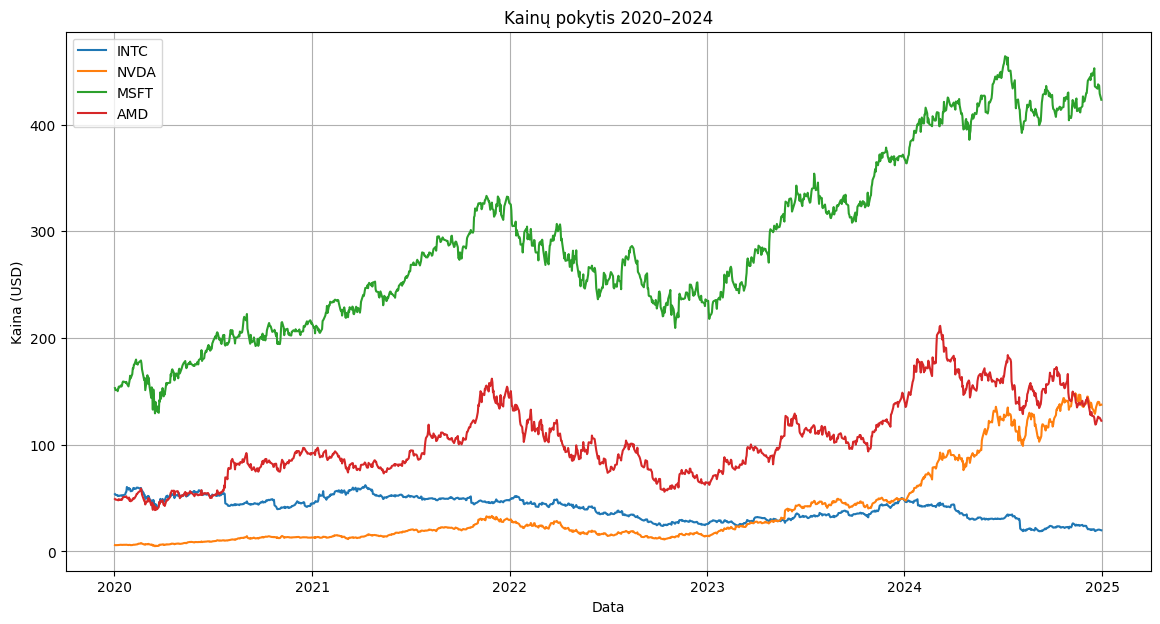

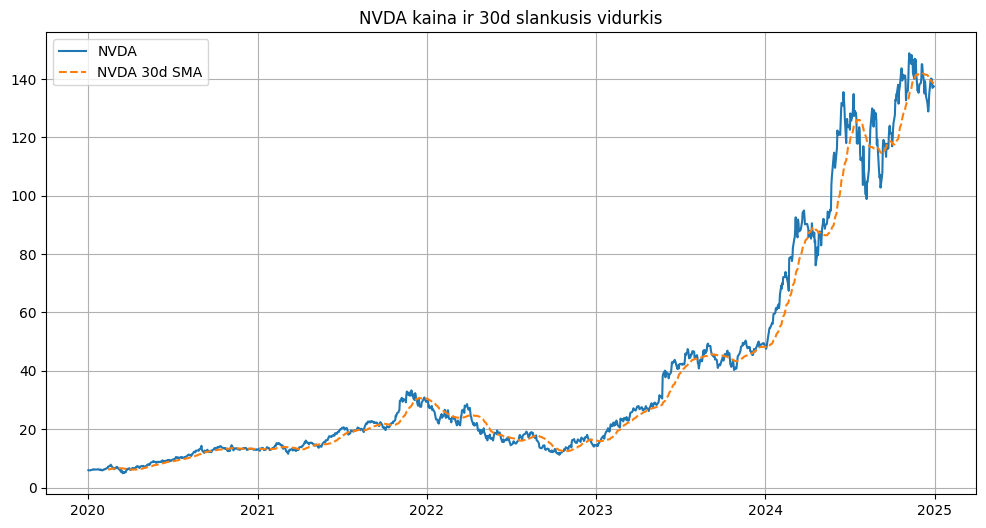

In [34]:
# Pavyzdžiui, vizualizuojam kelias akcijas
selected = ['INTC', 'NVDA', 'MSFT', 'AMD']
plt.figure(figsize=(14, 7))
for symbol in selected:
    plt.plot(data[symbol], label=symbol)
plt.title('Kainų pokytis 2020–2024')
plt.xlabel('Data')
plt.ylabel('Kaina (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Slankusis vidurkis (pvz., 30 dienų)
data['NVDA_SMA_30'] = data['NVDA'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(data['NVDA'], label='NVDA')
plt.plot(data['NVDA_SMA_30'], label='NVDA 30d SMA', linestyle='--')
plt.legend()
plt.title('NVDA kaina ir 30d slankusis vidurkis')
plt.grid()
plt.show()


In [5]:
returns = data.pct_change().dropna()
returns.head()

# Vidutinė dienos grąža
daily_mean_return = returns.mean()
print(daily_mean_return.sort_values(ascending=False))


Ticker
NVDA           0.003040
NVDA_SMA_30    0.002554
SHOP           0.001446
AMD            0.001211
NFLX           0.001131
SNAP           0.000907
MSFT           0.000906
AMZN           0.000848
WMT            0.000848
^IXIC          0.000699
^GSPC          0.000549
PG             0.000421
^DJI           0.000389
^RUT           0.000383
KO             0.000246
PEP            0.000244
JNJ            0.000153
NSRGY         -0.000032
INTC          -0.000513
dtype: float64


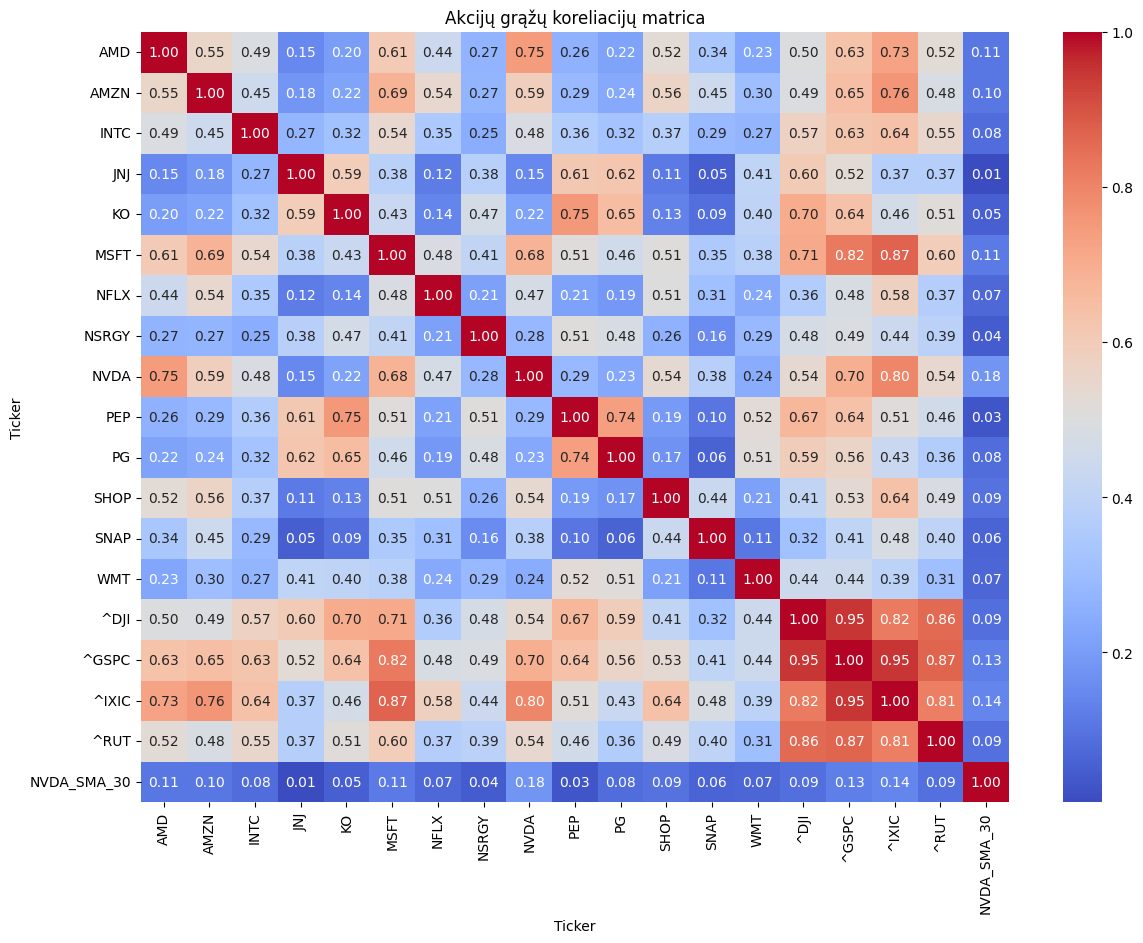

In [6]:
plt.figure(figsize=(14, 10))
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Akcijų grąžų koreliacijų matrica')
plt.show()


In [7]:
# Naudosime dienos grąžas
returns = data.pct_change().dropna()

# Metinė grąža ir kovariacijos matrica
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

# Konversija į metinius duomenis (252 prekybos dienos per metus)
annual_returns = mean_daily_returns * 252
annual_cov_matrix = cov_matrix * 252

# Simuliacijos parametrai
num_portfolios = 10000
results = np.zeros((3, num_portfolios))
weights_record = []

np.random.seed(42)

tickers = returns.columns

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)  # suma = 1
    weights_record.append(weights)

    # Portfelio grąža ir rizika
    port_return = np.dot(weights, annual_returns)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(annual_cov_matrix, weights)))
    sharpe_ratio = port_return / port_volatility

    results[0,i] = port_return
    results[1,i] = port_volatility
    results[2,i] = sharpe_ratio


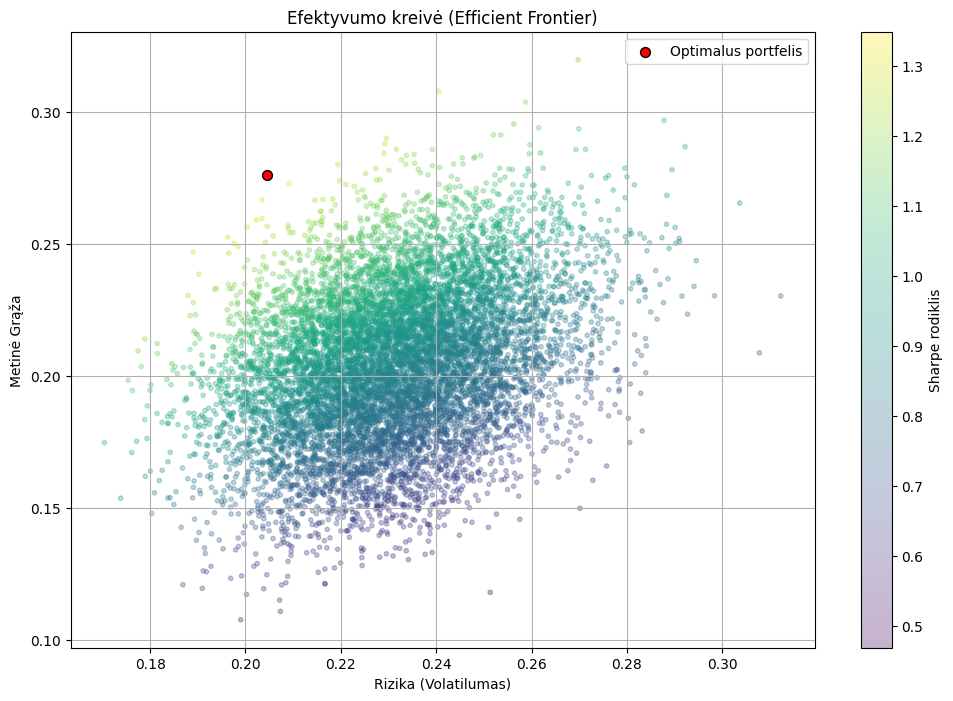

In [8]:
# Vizualizacija
plt.figure(figsize=(12, 8))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', marker='o', s=10, alpha=0.3)
plt.xlabel('Rizika (Volatilumas)')
plt.ylabel('Metinė Grąža')
plt.title('Efektyvumo kreivė (Efficient Frontier)')
plt.colorbar(label='Sharpe rodiklis')

# Optimalus portfelis
max_sharpe_idx = np.argmax(results[2])
max_sharpe_vol = results[1, max_sharpe_idx]
max_sharpe_ret = results[0, max_sharpe_idx]

plt.scatter(max_sharpe_vol, max_sharpe_ret, c='red', s=50, edgecolors='black', label='Optimalus portfelis')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
optimal_weights = weights_record[max_sharpe_idx]

print("Optimalus portfelis pagal Sharpe rodiklį:\n")
for i, ticker in enumerate(tickers):
    print(f"{ticker}: {optimal_weights[i]:.2%}")

print(f"\nMetinė grąža: {max_sharpe_ret:.2%}")
print(f"Metinis volatilumas: {max_sharpe_vol:.2%}")
print(f"Sharpe rodiklis: {results[2, max_sharpe_idx]:.2f}")


Optimalus portfelis pagal Sharpe rodiklį:

AMD: 1.09%
AMZN: 12.47%
INTC: 2.08%
JNJ: 3.16%
KO: 2.05%
MSFT: 4.23%
NFLX: 3.63%
NSRGY: 7.54%
NVDA: 12.50%
PEP: 0.66%
PG: 9.77%
SHOP: 1.61%
SNAP: 0.25%
WMT: 8.01%
^DJI: 10.96%
^GSPC: 2.21%
^IXIC: 4.29%
^RUT: 2.12%
NVDA_SMA_30: 11.37%

Metinė grąža: 27.59%
Metinis volatilumas: 20.45%
Sharpe rodiklis: 1.35


In [10]:
!pip install statsmodels --quiet
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta


In [11]:
# Naudojam tik NVDA uždarymo kainą
nvda = data['NVDA'].dropna()

# Pasirenkam mokymo ir testavimo laikotarpius
train_size = int(len(nvda) * 0.9)
train, test = nvda[:train_size], nvda[train_size:]

# Pasižiūrim į laikotarpį
print(f"Mokymo laikotarpis: {train.index[0]} – {train.index[-1]}")
print(f"Testavimo laikotarpis: {test.index[0]} – {test.index[-1]}")


Mokymo laikotarpis: 2020-01-02 00:00:00 – 2024-07-01 00:00:00
Testavimo laikotarpis: 2024-07-02 00:00:00 – 2024-12-30 00:00:00


In [32]:
# ARIMA(p, d, q) parametrai – pradžioje galima paprastai (1,1,1)
model = ARIMA(train, order=(40, 1, 40))
model_fit = model.fit()
print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

                               SARIMAX Results                                
Dep. Variable:                   NVDA   No. Observations:                 1131
Model:               ARIMA(40, 1, 40)   Log Likelihood               -1672.486
Date:                Sat, 14 Jun 2025   AIC                           3506.972
Time:                        11:23:02   BIC                           3914.399
Sample:                             0   HQIC                          3660.901
                               - 1131                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1443      0.449     -0.321      0.748      -1.024       0.736
ar.L2         -0.1283      0.398     -0.323      0.747      -0.907       0.651
ar.L3          0.1221      0.314      0.388      0.6

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


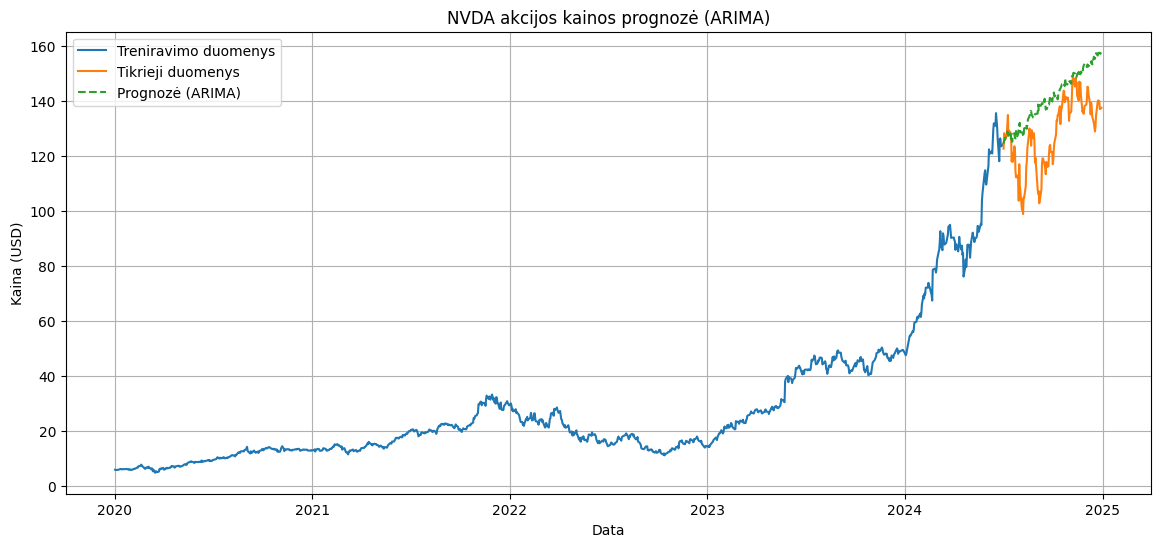

In [35]:
# Prognozuojam tiek dienų, kiek turime testavimui
forecast_steps = len(test)
forecast = model_fit.forecast(steps=forecast_steps)

# Paruošiam prognozės datų indeksą
forecast_dates = test.index

# Pateikiam prognozę
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label='Treniravimo duomenys')
plt.plot(test.index, test, label='Tikrieji duomenys')
plt.plot(forecast_dates, forecast, label='Prognozė (ARIMA)', linestyle='--')
plt.title('NVDA akcijos kainos prognozė (ARIMA)')
plt.xlabel('Data')
plt.ylabel('Kaina (USD)')
plt.legend()
plt.grid()
plt.show()


In [17]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"Prognozės RMSE: {rmse:.2f} USD")


Prognozės RMSE: 13.61 USD


Vidutinė kvadratinė paklaida (MSE): 4973.59


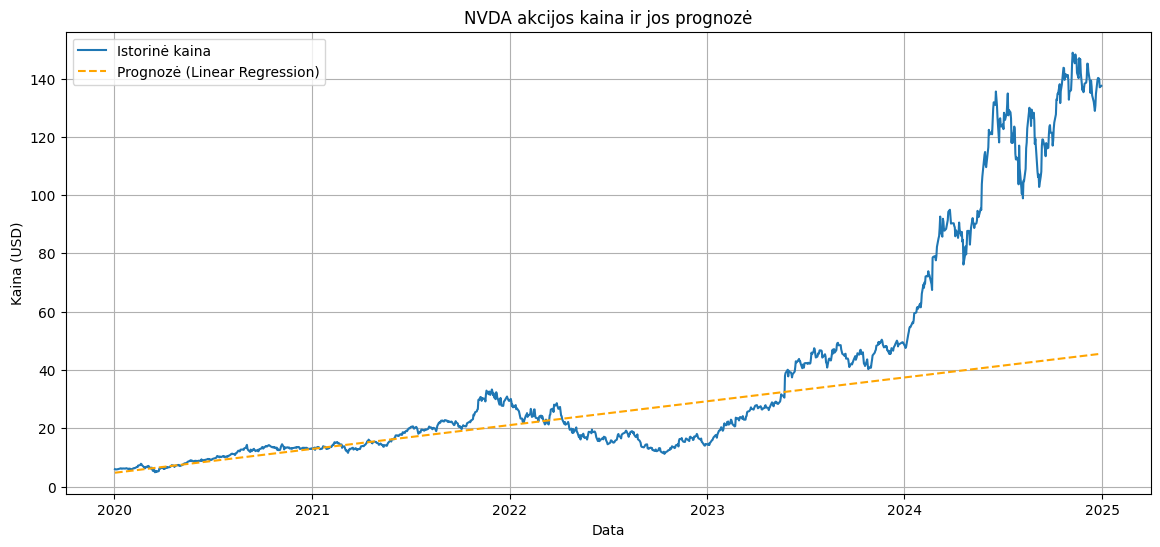

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Pasirinkime 1 akciją, pvz., NVDA
df = data[['NVDA']].dropna().reset_index()
df['Date_ordinal'] = df['Date'].map(datetime.toordinal)

# Modeliavimui pasiruošiame X ir y
X = df[['Date_ordinal']]
y = df['NVDA']

# Padaliname į treniravimo ir testavimo rinkinius
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Modelis
model = LinearRegression()
model.fit(X_train, y_train)

# Prognozės
y_pred = model.predict(X_test)

# Apskaičiuojame paklaidą
mse = mean_squared_error(y_test, y_pred)
print(f"Vidutinė kvadratinė paklaida (MSE): {mse:.2f}")

# Pridėkime prognozuotą reikšmę į originalų dataframe
df['Prediction'] = model.predict(X)

# Vizualizacija
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['NVDA'], label='Istorinė kaina')
plt.plot(df['Date'], df['Prediction'], label='Prognozė (Linear Regression)', linestyle='--', color='orange')
plt.title('NVDA akcijos kaina ir jos prognozė')
plt.xlabel('Data')
plt.ylabel('Kaina (USD)')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


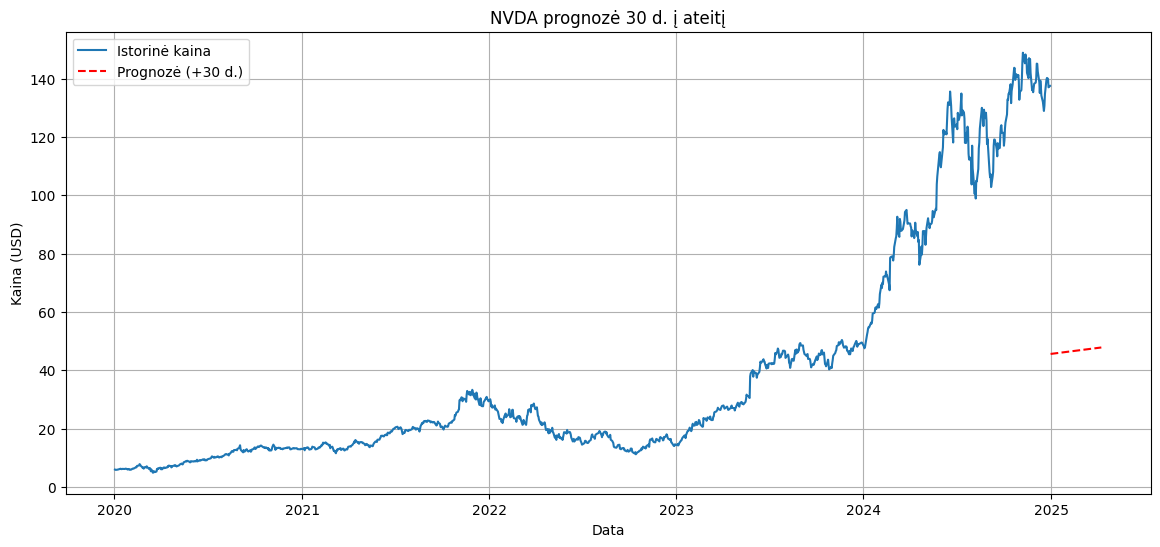

In [38]:
# Prognozė 30 d. į ateitį
last_date = df['Date'].max()
future_days = 100
future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, future_days + 1)]
future_ordinals = [[date.toordinal()] for date in future_dates]
future_preds = model.predict(future_ordinals)

# Sukuriam dataframe
future_df = pd.DataFrame({
    'Date': future_dates,
    'Prediction': future_preds
})

# Grafikas
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['NVDA'], label='Istorinė kaina')
plt.plot(future_df['Date'], future_df['Prediction'], label='Prognozė (+30 d.)', linestyle='--', color='red')
plt.title('NVDA prognozė 30 d. į ateitį')
plt.xlabel('Data')
plt.ylabel('Kaina (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [39]:
!pip install tensorflow --quiet

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 16s 148ms/step - loss: 0.0053 - val_loss: 0.0053
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 4.4662e-04 - val_loss: 0.0044
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 1.9423e-04 - val_loss: 0.0051
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 2.0022e-04 - val_loss: 0.0036
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 1.7106e-04 - val_loss: 0.0032
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 1.6876e-04 - val_loss: 0.0030
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 1.5329e-04 - val_loss: 0.0033
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 1.6246e-04 - val_loss: 0.0028
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 1.4910e-04 - val_loss: 0.0025
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 1.3182e-04 - val_loss: 0.0035
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


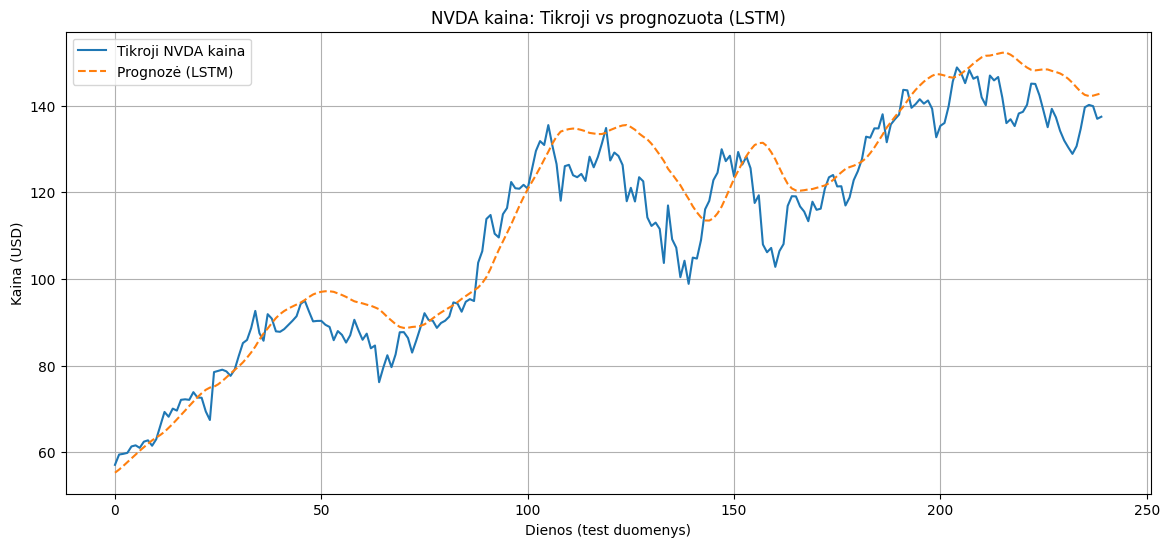

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# 1. Naudojame NVDA kainą
df = data[['NVDA']].dropna()

# 2. Normalizuojame kainas
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# 3. Sukuriame sekas mokymui (60 dienų langas)
sequence_length = 60
x = []
y = []

for i in range(sequence_length, len(scaled_data)):
    x.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

x, y = np.array(x), np.array(y)

# Reikia reshape'inti į [pavyzdžiai, laikai, požymiai]
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

# 4. Skirstome į treniravimo ir testavimo duomenis (80/20)
split = int(len(x) * 0.8)
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

# 5. Kuriame LSTM modelį
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# 6. Apmokome modelį
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), verbose=1)

# 7. Prognozė ant test duomenų
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

# Grąžiname realias test reikšmes į normalią skalę
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# 8. Grafikas
plt.figure(figsize=(14, 6))
plt.plot(real_prices, label='Tikroji NVDA kaina')
plt.plot(predictions, label='Prognozė (LSTM)', linestyle='--')
plt.title('NVDA kaina: Tikroji vs prognozuota (LSTM)')
plt.xlabel('Dienos (test duomenys)')
plt.ylabel('Kaina (USD)')
plt.legend()
plt.grid(True)
plt.show()


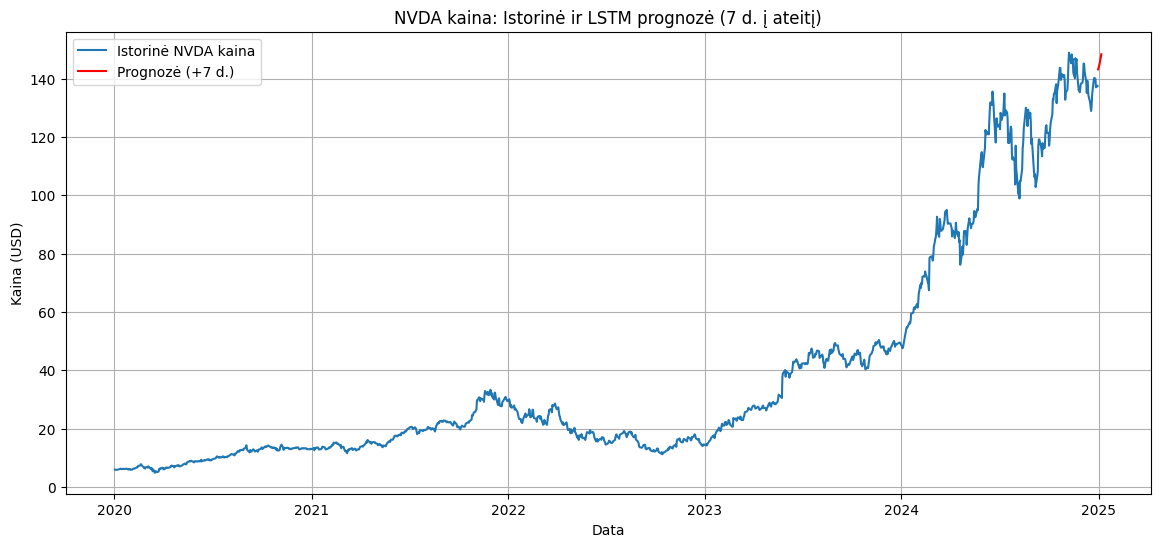

In [47]:
# 1. Paimame paskutines 60 dienų reikšmes
last_sequence = scaled_data[-60:]
future_sequence = last_sequence.copy()

# 2. Tuščias sąrašas prognozėms
future_predictions = []

for _ in range(7):  # prognozuojame 7 dienoms
    input_seq = np.reshape(future_sequence[-60:], (1, 60, 1))
    next_pred = model.predict(input_seq, verbose=0)

    future_predictions.append(next_pred[0][0])
    future_sequence = np.append(future_sequence, next_pred)[-60:]

# 3. Inversuojame normalizaciją
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# 4. Sukuriame datas ateičiai
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7)

# 5. Duomenys grafiko rodymui
future_df = pd.DataFrame({'Date': future_dates, 'Prediction': future_predictions.flatten()})
historical_df = df.reset_index()[['Date', 'NVDA']].copy()

# 6. Vizualizacija
plt.figure(figsize=(14, 6))
plt.plot(historical_df['Date'], historical_df['NVDA'], label='Istorinė NVDA kaina')
plt.plot(future_df['Date'], future_df['Prediction'], label='Prognozė (+7 d.)', color='red')
plt.title('NVDA kaina: Istorinė ir LSTM prognozė (7 d. į ateitį)')
plt.xlabel('Data')
plt.ylabel('Kaina (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [48]:
!pip install prophet --quiet


In [49]:
from prophet import Prophet

# Naudosime tik uždarymo kainą (pvz., NVDA)
df_prophet = df[['NVDA']].reset_index()
df_prophet.columns = ['ds', 'y']  # Prophet reikalauja tokių stulpelių: ds = data, y = reikšmė


In [50]:
model = Prophet(daily_seasonality=True)
model.fit(df_prophet)


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/x9_m5e9e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/6uj8qfb8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68565', 'data', 'file=/tmp/tmp_rsqlyd4/x9_m5e9e.json', 'init=/tmp/tmp_rsqlyd4/6uj8qfb8.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_modelozhfshh0/prophet_model-20250614121828.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:18:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:18:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [51]:
future = model.make_future_dataframe(periods=30)  # 30 dienų į ateitį
forecast = model.predict(future)

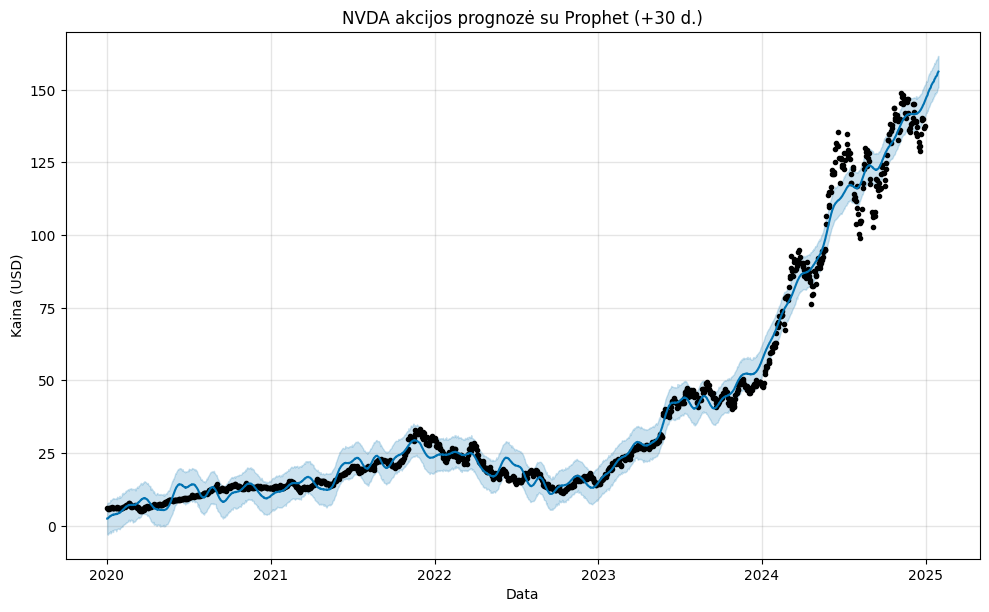

In [52]:
fig1 = model.plot(forecast)
plt.title('NVDA akcijos prognozė su Prophet (+30 d.)')
plt.xlabel('Data')
plt.ylabel('Kaina (USD)')
plt.grid(True)
plt.show()

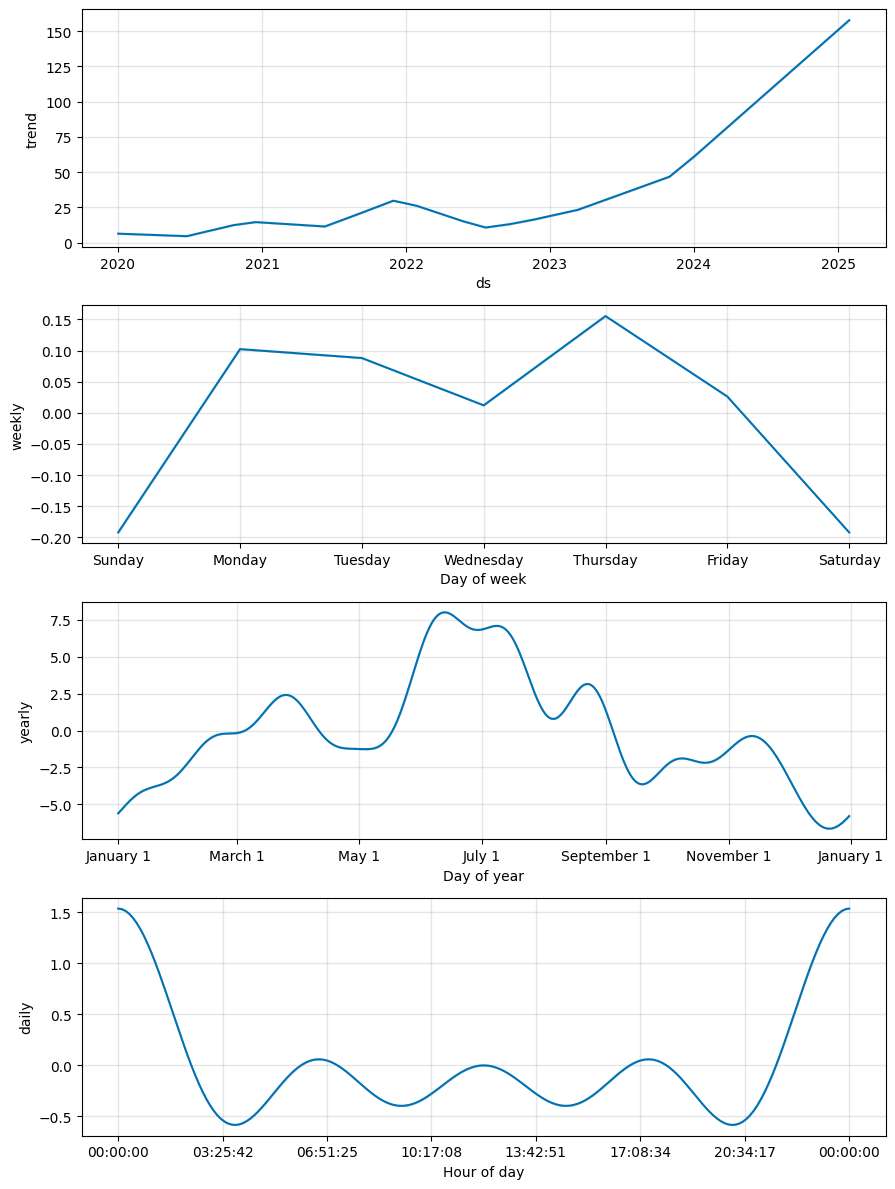

In [53]:
fig2 = model.plot_components(forecast)
plt.show()

In [54]:
!pip install prophet --quiet
!pip install holidays --quiet

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/t_5onvr6.json



🔮 Prognozuojama: INTC


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/_lz6l635.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24838', 'data', 'file=/tmp/tmp_rsqlyd4/t_5onvr6.json', 'init=/tmp/tmp_rsqlyd4/_lz6l635.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_modelz70861sf/prophet_model-20250614122102.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:21:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:21:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


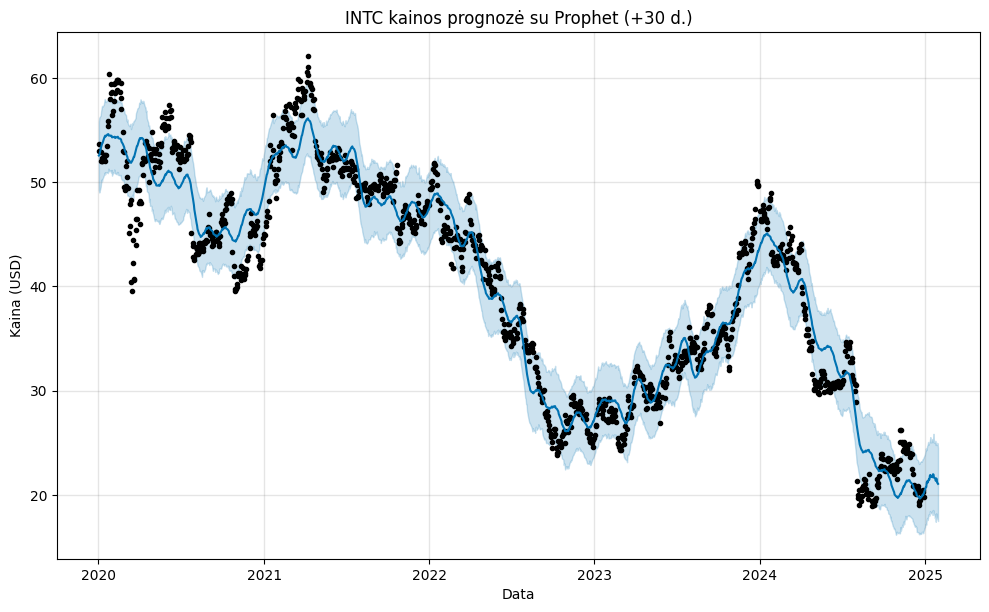

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/ds_b_x1b.json



🔮 Prognozuojama: NVDA


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/6_htjfn6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46925', 'data', 'file=/tmp/tmp_rsqlyd4/ds_b_x1b.json', 'init=/tmp/tmp_rsqlyd4/6_htjfn6.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_modelu2e12ufm/prophet_model-20250614122106.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:21:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:21:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


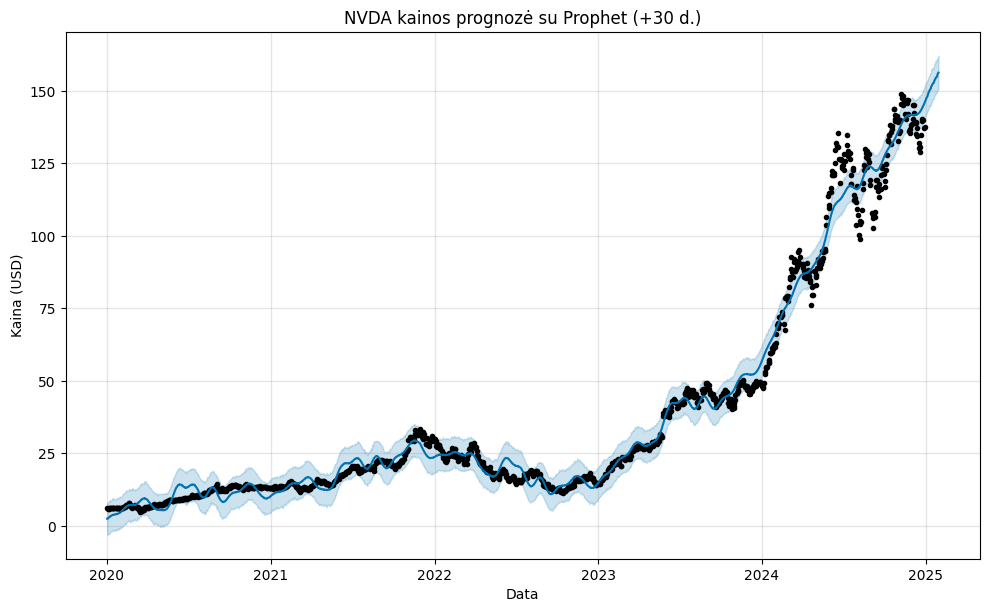

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/qgpksa1g.json



🔮 Prognozuojama: MSFT


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/grnykyq3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39174', 'data', 'file=/tmp/tmp_rsqlyd4/qgpksa1g.json', 'init=/tmp/tmp_rsqlyd4/grnykyq3.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_model231z3vcd/prophet_model-20250614122112.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:21:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:21:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


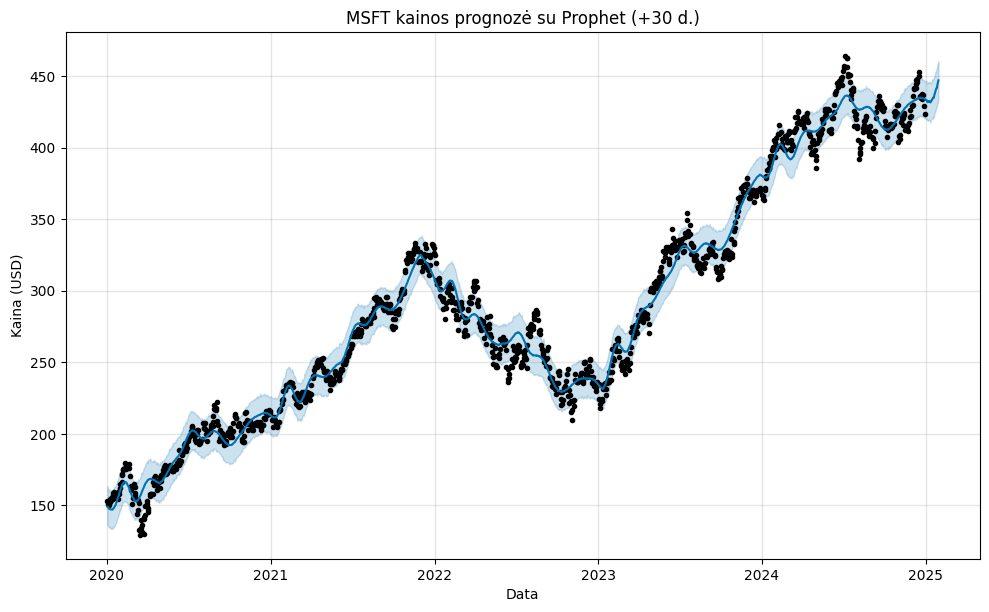

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/mq3xezj8.json



🔮 Prognozuojama: AMD


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/krkc9is_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24951', 'data', 'file=/tmp/tmp_rsqlyd4/mq3xezj8.json', 'init=/tmp/tmp_rsqlyd4/krkc9is_.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_modelaz43tp2k/prophet_model-20250614122117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:21:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:21:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


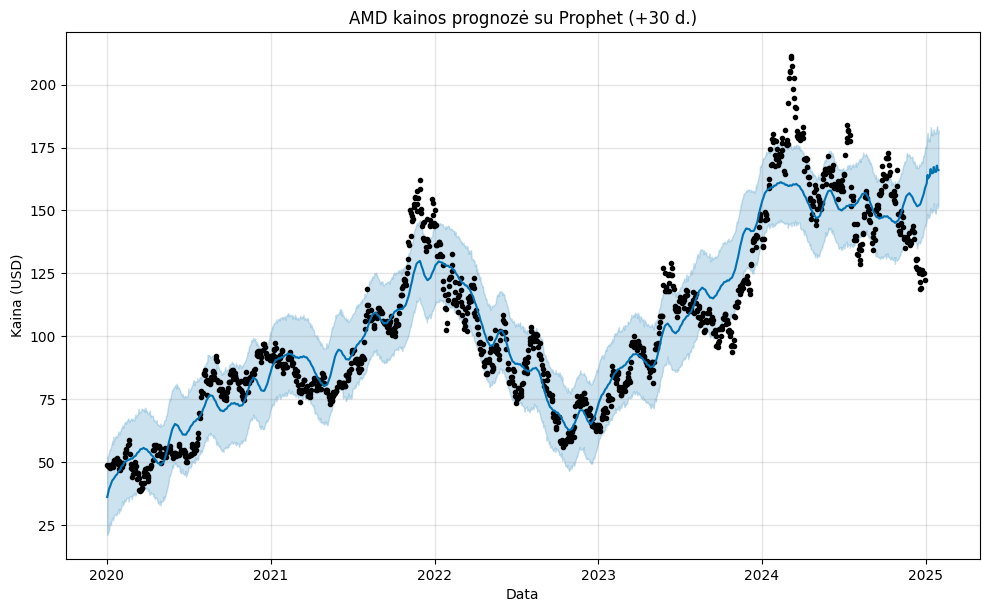

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/0lv6p9mh.json



🔮 Prognozuojama: NFLX


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/vhypvsul.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57554', 'data', 'file=/tmp/tmp_rsqlyd4/0lv6p9mh.json', 'init=/tmp/tmp_rsqlyd4/vhypvsul.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_modelr7j_39nw/prophet_model-20250614122121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:21:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:21:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


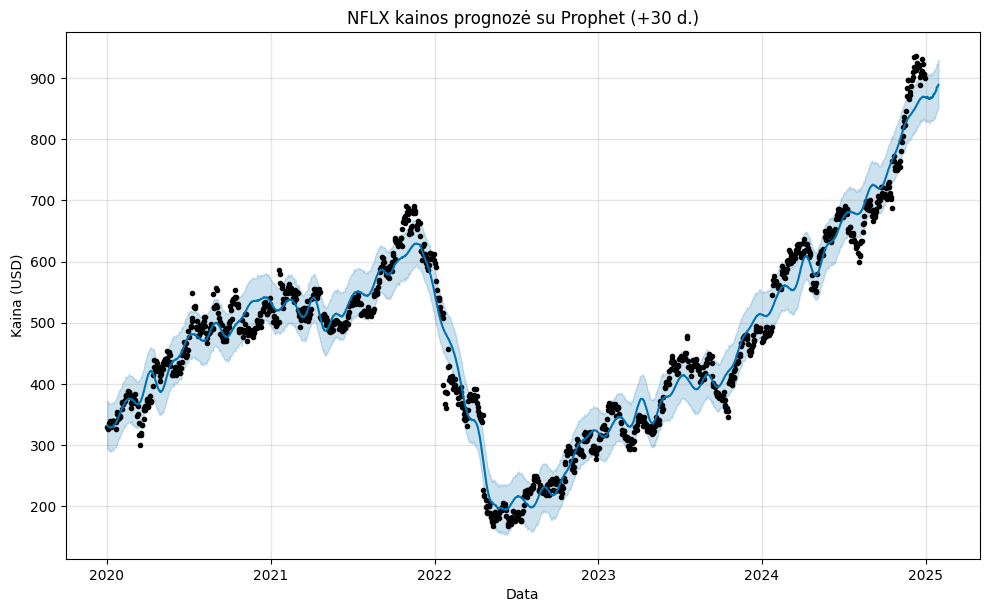

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/cdpphhjq.json



🔮 Prognozuojama: SNAP


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/2h8cxta7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2522', 'data', 'file=/tmp/tmp_rsqlyd4/cdpphhjq.json', 'init=/tmp/tmp_rsqlyd4/2h8cxta7.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_modelzqfrvqds/prophet_model-20250614122123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:21:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:21:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


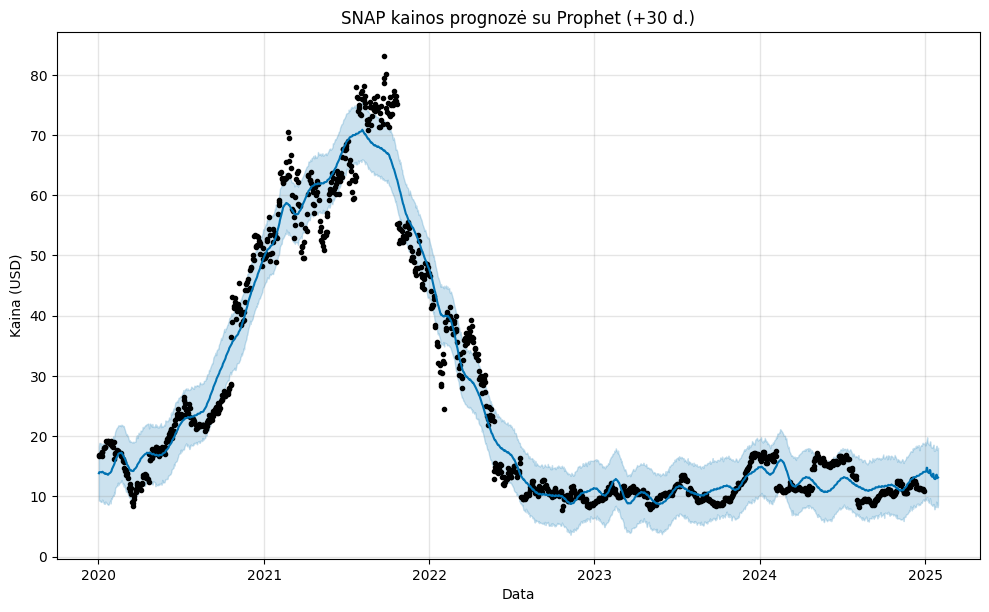

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/p83uqojo.json



🔮 Prognozuojama: AMZN


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/z3onsv84.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62883', 'data', 'file=/tmp/tmp_rsqlyd4/p83uqojo.json', 'init=/tmp/tmp_rsqlyd4/z3onsv84.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_modelz5ie4t0p/prophet_model-20250614122127.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:21:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:21:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


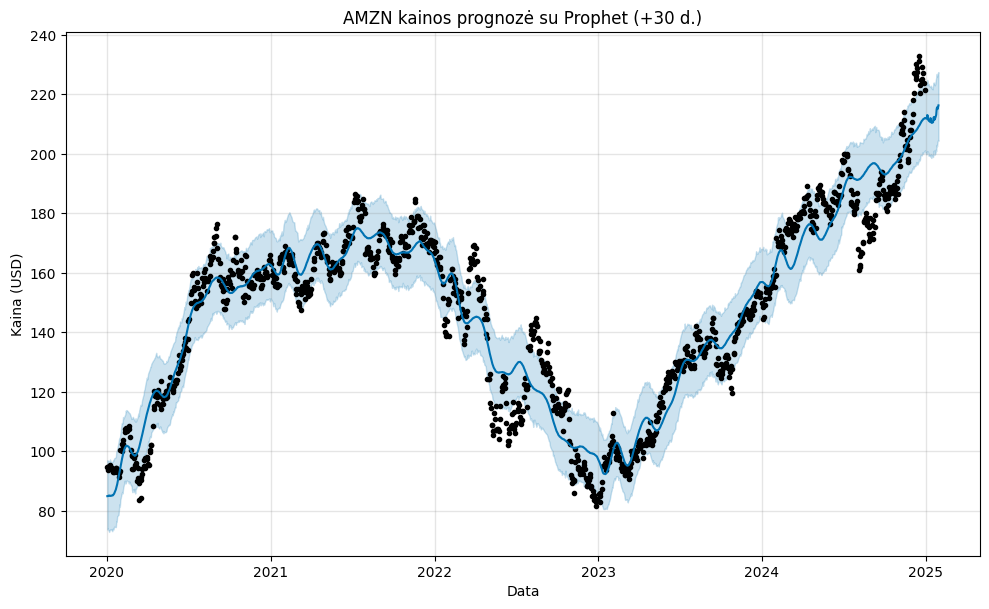

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/m02asa__.json



🔮 Prognozuojama: SHOP


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/6ffzps71.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60768', 'data', 'file=/tmp/tmp_rsqlyd4/m02asa__.json', 'init=/tmp/tmp_rsqlyd4/6ffzps71.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_modell1z5bsye/prophet_model-20250614122129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:21:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:21:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


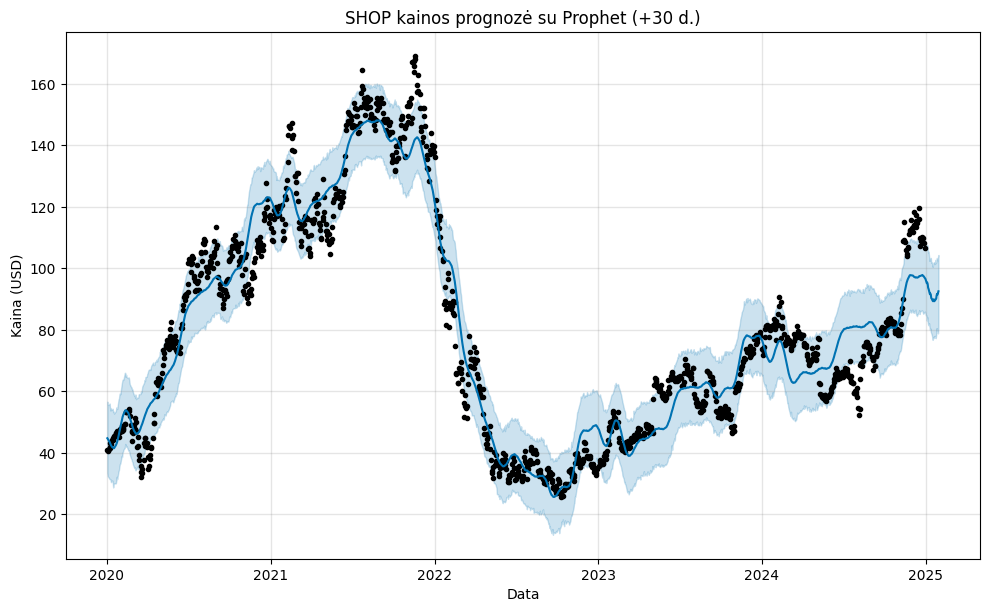

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/7x3r_aaz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/iafxk2gz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27856', 'data', 'file=/tmp/tmp_rsqlyd4/7x3r_aaz.json', 'init=/tmp/tmp_rsqlyd4/iafxk2gz.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_modelsvvkjgcp/prophet_model-20250614122131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:21:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



🔮 Prognozuojama: KO


12:21:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


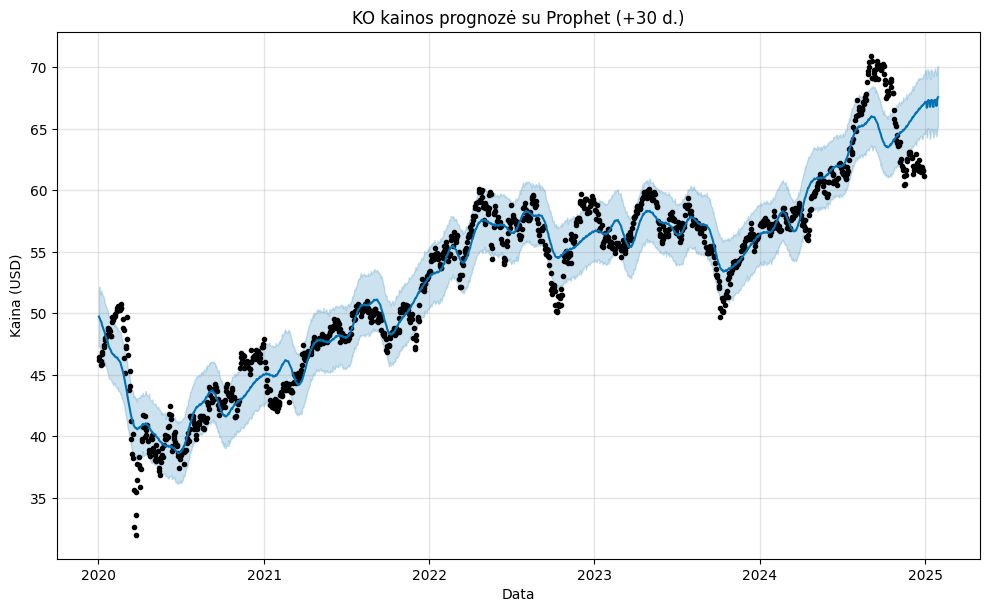

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/3jxfh7i0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/wp69un3s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99982', 'data', 'file=/tmp/tmp_rsqlyd4/3jxfh7i0.json', 'init=/tmp/tmp_rsqlyd4/wp69un3s.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_model7ef1qpr6/prophet_model-20250614122132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:21:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



🔮 Prognozuojama: PEP


12:21:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


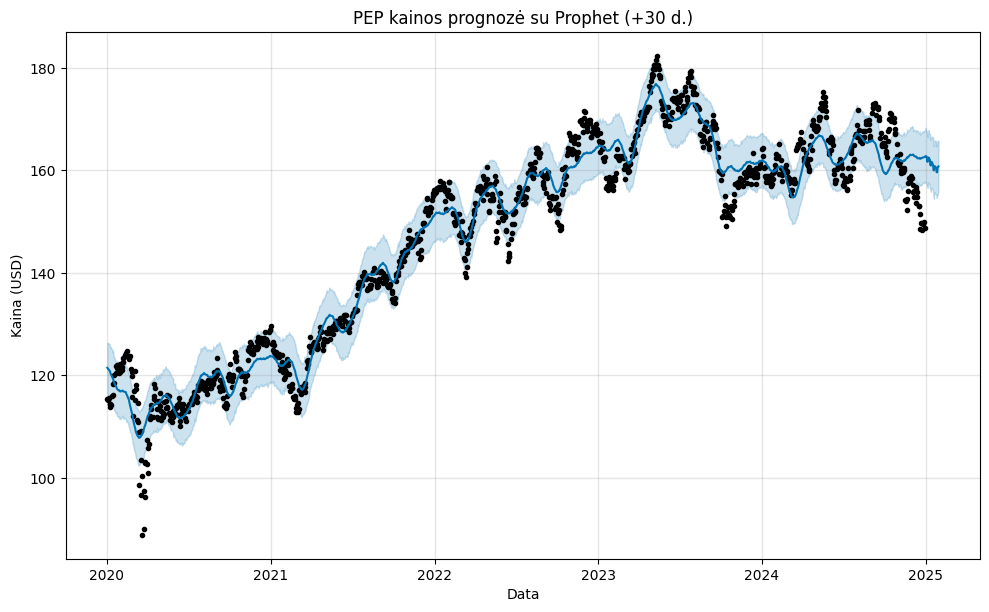

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/u8yj10a_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/qvfmlc2n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73857', 'data', 'file=/tmp/tmp_rsqlyd4/u8yj10a_.json', 'init=/tmp/tmp_rsqlyd4/qvfmlc2n.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_model9062vr46/prophet_model-20250614122133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:21:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



🔮 Prognozuojama: NSRGY


12:21:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


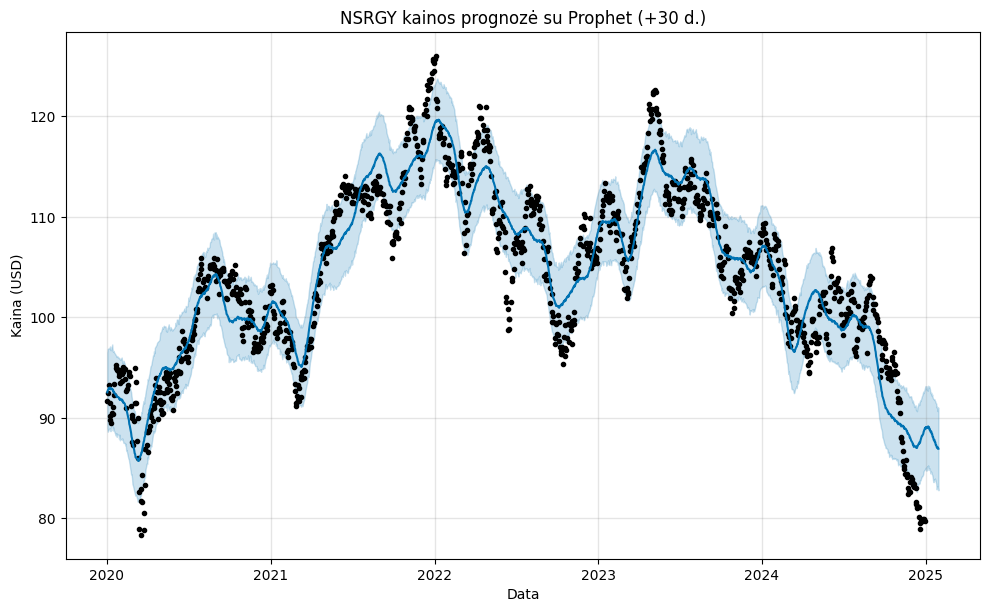

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/y7a9bwrd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/bapsswkw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98916', 'data', 'file=/tmp/tmp_rsqlyd4/y7a9bwrd.json', 'init=/tmp/tmp_rsqlyd4/bapsswkw.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_model7jlesd_a/prophet_model-20250614122135.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:21:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



🔮 Prognozuojama: JNJ


12:21:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


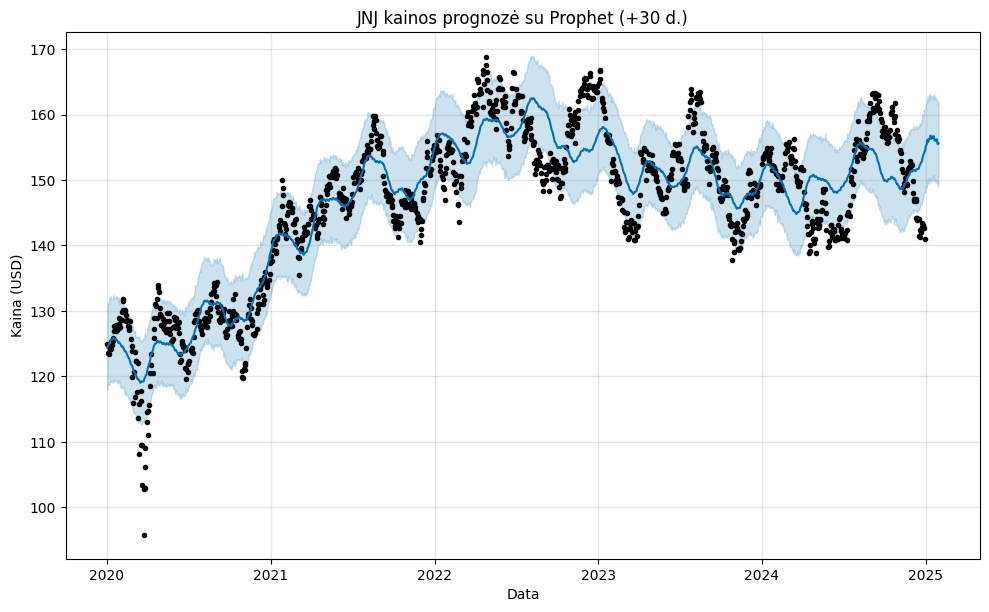

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/mt3dgef2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/rn5m_mw5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72367', 'data', 'file=/tmp/tmp_rsqlyd4/mt3dgef2.json', 'init=/tmp/tmp_rsqlyd4/rn5m_mw5.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_modelr4r37ei4/prophet_model-20250614122136.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:21:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



🔮 Prognozuojama: WMT


12:21:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


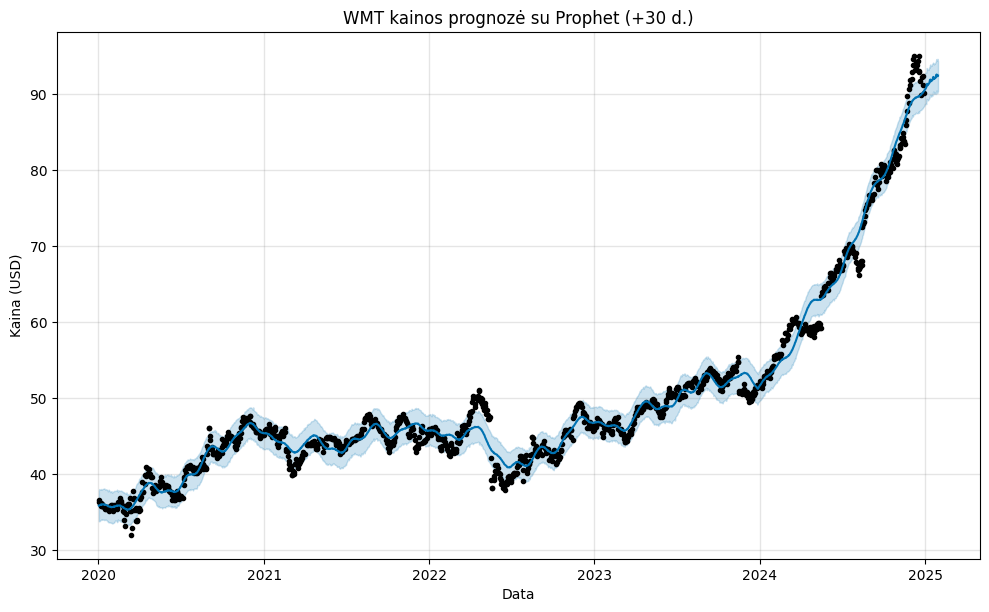

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/jf38lppf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/vagwyufq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87451', 'data', 'file=/tmp/tmp_rsqlyd4/jf38lppf.json', 'init=/tmp/tmp_rsqlyd4/vagwyufq.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_modelq8d1f8hr/prophet_model-20250614122137.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:21:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



🔮 Prognozuojama: PG


12:21:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


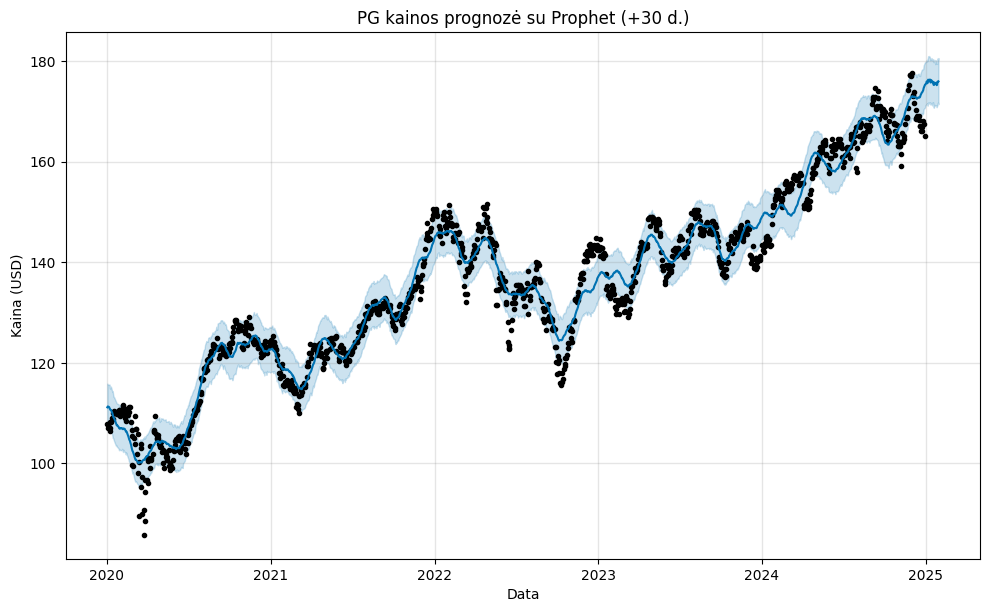

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/n6rptonb.json



🔮 Prognozuojama: ^GSPC


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/lk2l7zud.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77986', 'data', 'file=/tmp/tmp_rsqlyd4/n6rptonb.json', 'init=/tmp/tmp_rsqlyd4/lk2l7zud.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_model3vxpwkkr/prophet_model-20250614122139.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:21:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:21:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


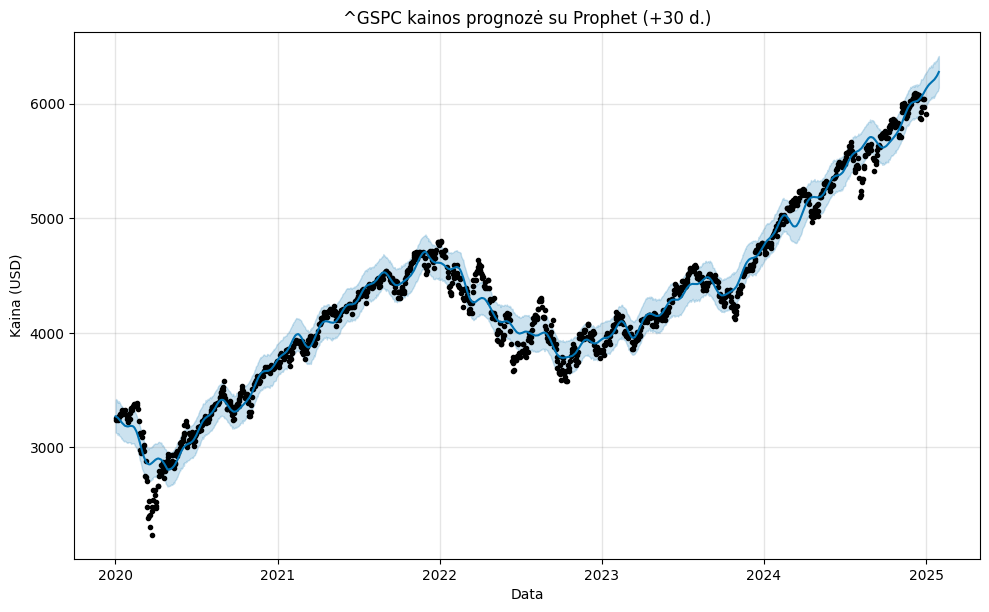

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/2tk3u74f.json



🔮 Prognozuojama: ^IXIC


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/6ndqs890.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83508', 'data', 'file=/tmp/tmp_rsqlyd4/2tk3u74f.json', 'init=/tmp/tmp_rsqlyd4/6ndqs890.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_model7zo9n4ft/prophet_model-20250614122140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:21:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:21:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


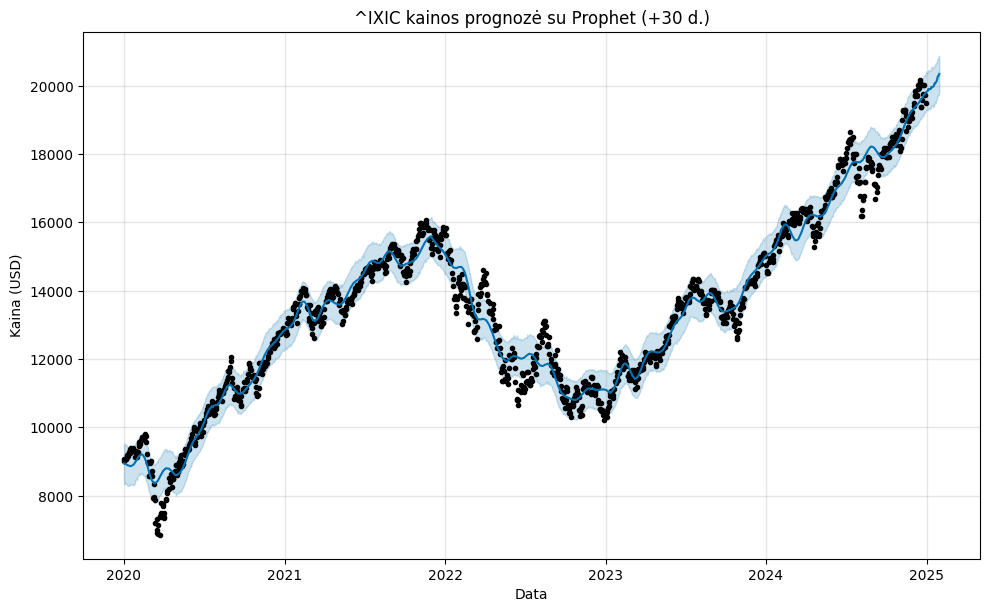

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/i2z62skd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/je324crs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35029', 'data', 'file=/tmp/tmp_rsqlyd4/i2z62skd.json', 'init=/tmp/tmp_rsqlyd4/je324crs.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_modelc4o6oejg/prophet_model-20250614122142.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:21:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



🔮 Prognozuojama: ^DJI


12:21:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


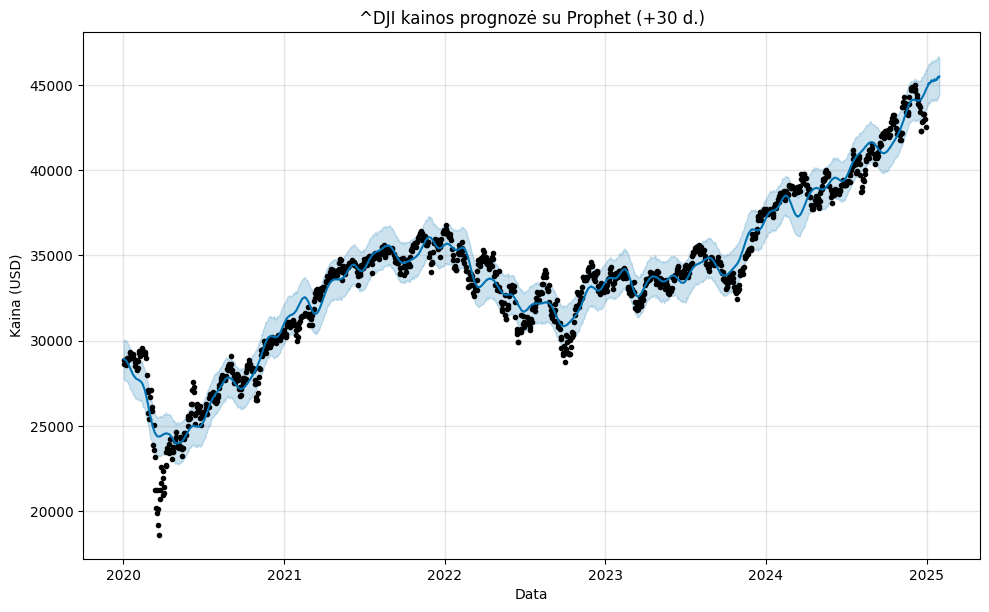

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/f3232puo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/eocp_wvg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13564', 'data', 'file=/tmp/tmp_rsqlyd4/f3232puo.json', 'init=/tmp/tmp_rsqlyd4/eocp_wvg.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_modelcur_st21/prophet_model-20250614122143.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:21:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



🔮 Prognozuojama: ^RUT


12:21:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


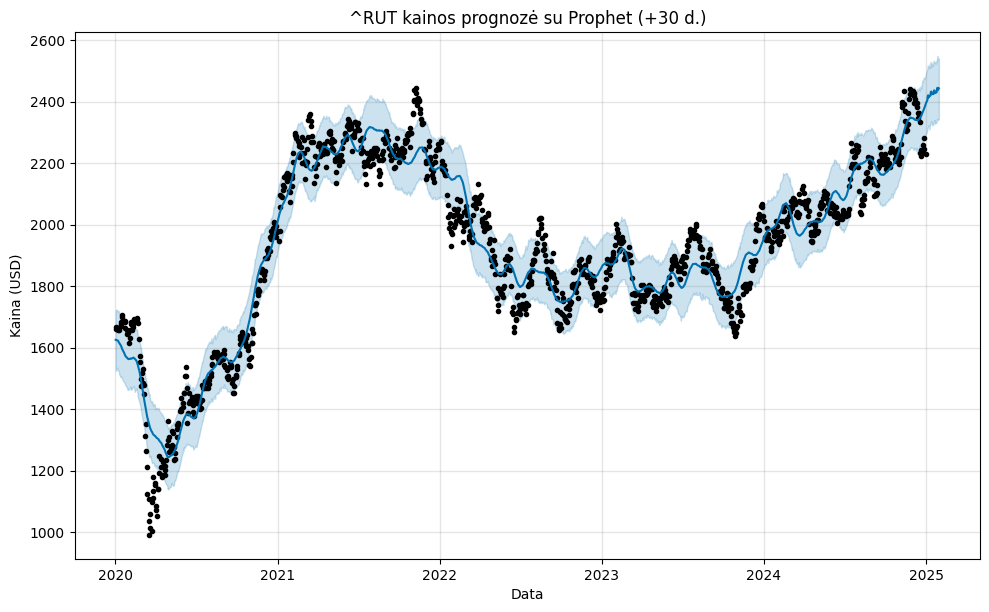

In [55]:
from prophet import Prophet
from prophet.plot import plot_plotly
import holidays
import matplotlib.pyplot as plt

# Šventinės dienos (pvz., JAV)
us_holidays = holidays.US()

# Pasirenkam kiek dienų į priekį prognozuoti
forecast_days = 30

# Galima sumažinti simbolių kiekį testavimui, pvz., symbols[:5]
for symbol in symbols:
    try:
        print(f"\n🔮 Prognozuojama: {symbol}")

        df_single = data[[symbol]].reset_index()
        df_single.columns = ['ds', 'y']
        df_single = df_single.dropna()

        model = Prophet(daily_seasonality=True, holidays_prior_scale=10)

        # Pridedam JAV šventines dienas
        holidays_df = pd.DataFrame([
            {'ds': date, 'holiday': 'us_holiday'}
            for date in us_holidays if df_single['ds'].min() <= pd.to_datetime(date) <= df_single['ds'].max()
        ])
        model.holidays = holidays_df

        model.fit(df_single)

        future = model.make_future_dataframe(periods=forecast_days)
        forecast = model.predict(future)

        # Braižom prognozę
        fig = model.plot(forecast)
        plt.title(f"{symbol} kainos prognozė su Prophet (+{forecast_days} d.)")
        plt.xlabel('Data')
        plt.ylabel('Kaina (USD)')
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"⚠️ Nepavyko prognozuoti {symbol}: {e}")


🔮 Prognozuojama GRĄŽA: INTC


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/2_c_auko.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/mrn41jwj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38153', 'data', 'file=/tmp/tmp_rsqlyd4/2_c_auko.json', 'init=/tmp/tmp_rsqlyd4/mrn41jwj.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_modelkhq4rf_9/prophet_model-20250614122348.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:23:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:23:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


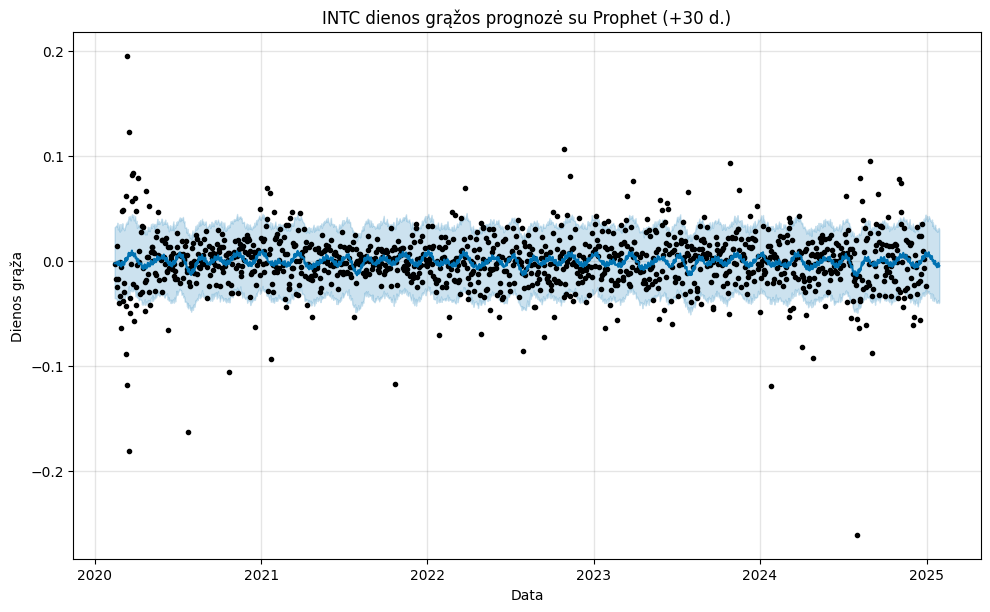

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/azjkl29c.json



🔮 Prognozuojama GRĄŽA: NVDA


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/do6ocdq3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71397', 'data', 'file=/tmp/tmp_rsqlyd4/azjkl29c.json', 'init=/tmp/tmp_rsqlyd4/do6ocdq3.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_modelwsx5doj7/prophet_model-20250614122351.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:23:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:23:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


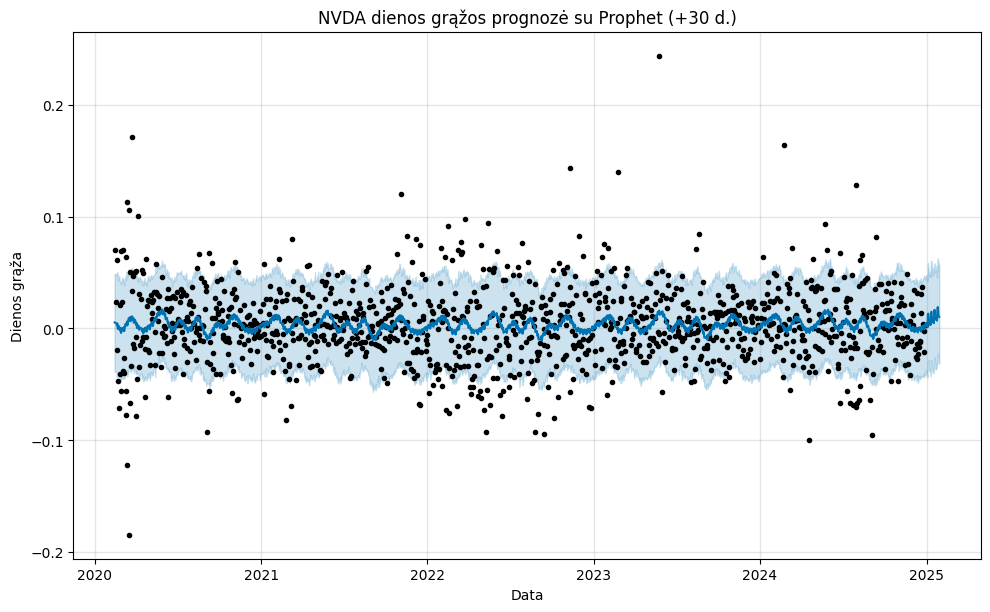

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/d5e5eeuc.json



🔮 Prognozuojama GRĄŽA: MSFT


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/5ny7mzop.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50268', 'data', 'file=/tmp/tmp_rsqlyd4/d5e5eeuc.json', 'init=/tmp/tmp_rsqlyd4/5ny7mzop.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_model7id3s4uz/prophet_model-20250614122352.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:23:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:23:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


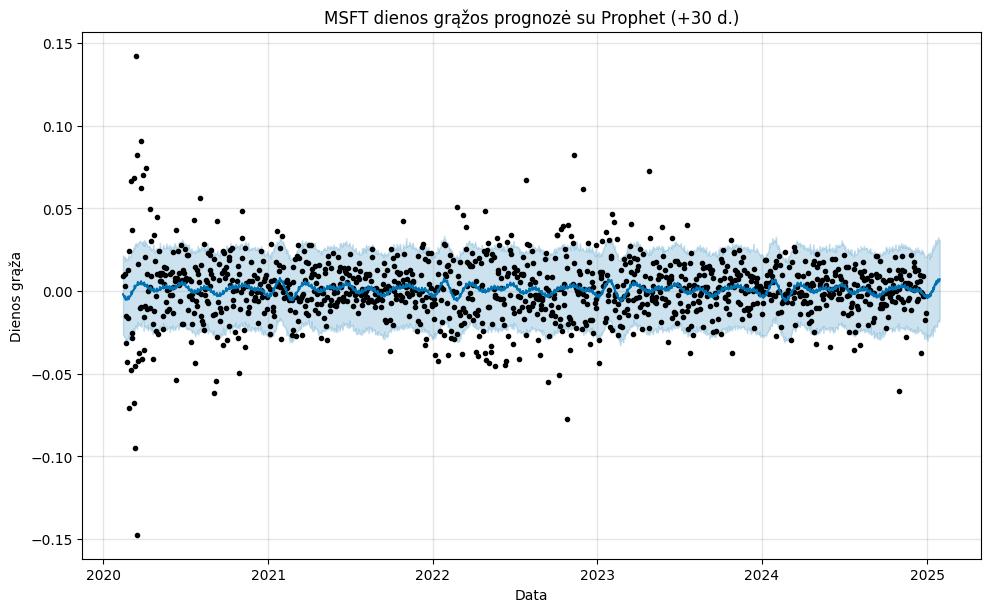

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/vhkvox8s.json



🔮 Prognozuojama GRĄŽA: AMD


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/1t86267x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93164', 'data', 'file=/tmp/tmp_rsqlyd4/vhkvox8s.json', 'init=/tmp/tmp_rsqlyd4/1t86267x.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_modelyjslm__h/prophet_model-20250614122353.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:23:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:23:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


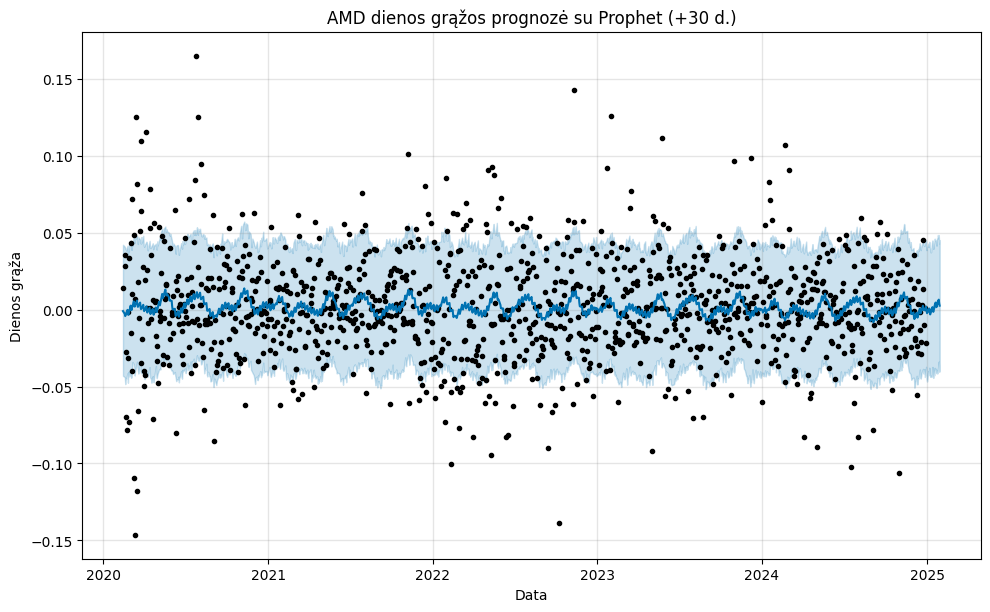

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/c7wkg61_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/pv5axg97.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30718', 'data', 'file=/tmp/tmp_rsqlyd4/c7wkg61_.json', 'init=/tmp/tmp_rsqlyd4/pv5axg97.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_model5vx4s6qb/prophet_model-20250614122355.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:23:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



🔮 Prognozuojama GRĄŽA: NFLX


12:23:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


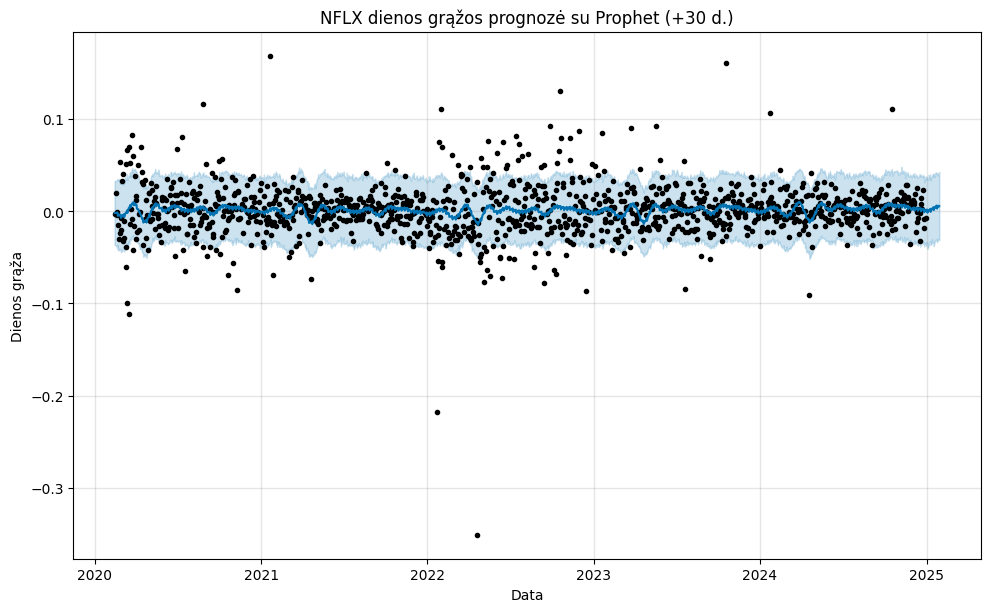

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/g8ur5wn9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/44b1rb2s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53077', 'data', 'file=/tmp/tmp_rsqlyd4/g8ur5wn9.json', 'init=/tmp/tmp_rsqlyd4/44b1rb2s.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_model7mox3qdn/prophet_model-20250614122355.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:23:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



🔮 Prognozuojama GRĄŽA: SNAP


12:23:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


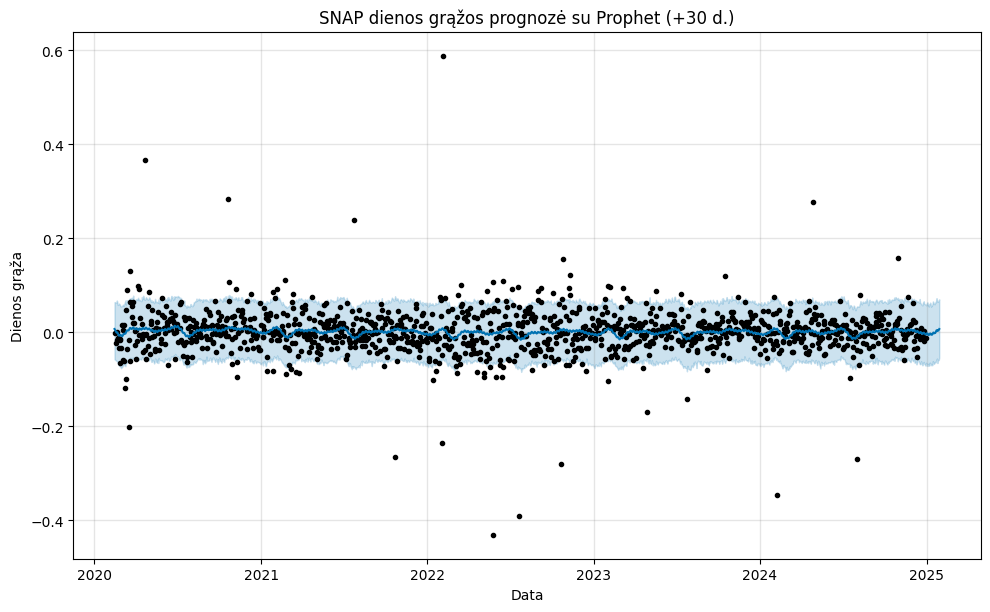

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/dq_dzcoe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/k4qp5iiu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32405', 'data', 'file=/tmp/tmp_rsqlyd4/dq_dzcoe.json', 'init=/tmp/tmp_rsqlyd4/k4qp5iiu.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_modelzbdhgfi6/prophet_model-20250614122356.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:23:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



🔮 Prognozuojama GRĄŽA: AMZN


12:23:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


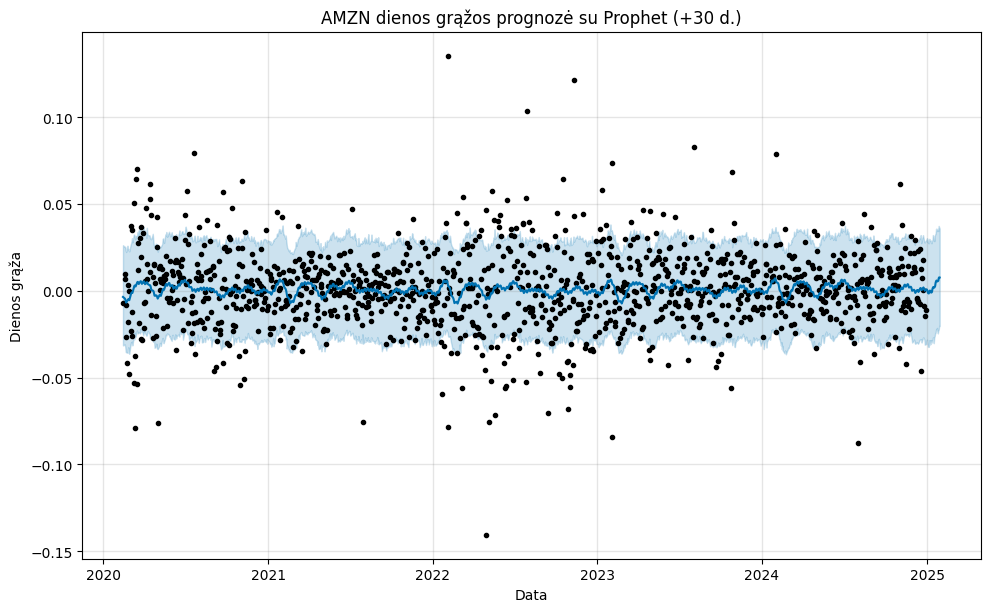

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/nuwflzre.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/943tnmkd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10676', 'data', 'file=/tmp/tmp_rsqlyd4/nuwflzre.json', 'init=/tmp/tmp_rsqlyd4/943tnmkd.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_model03uazcvv/prophet_model-20250614122357.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:23:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



🔮 Prognozuojama GRĄŽA: SHOP


12:23:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


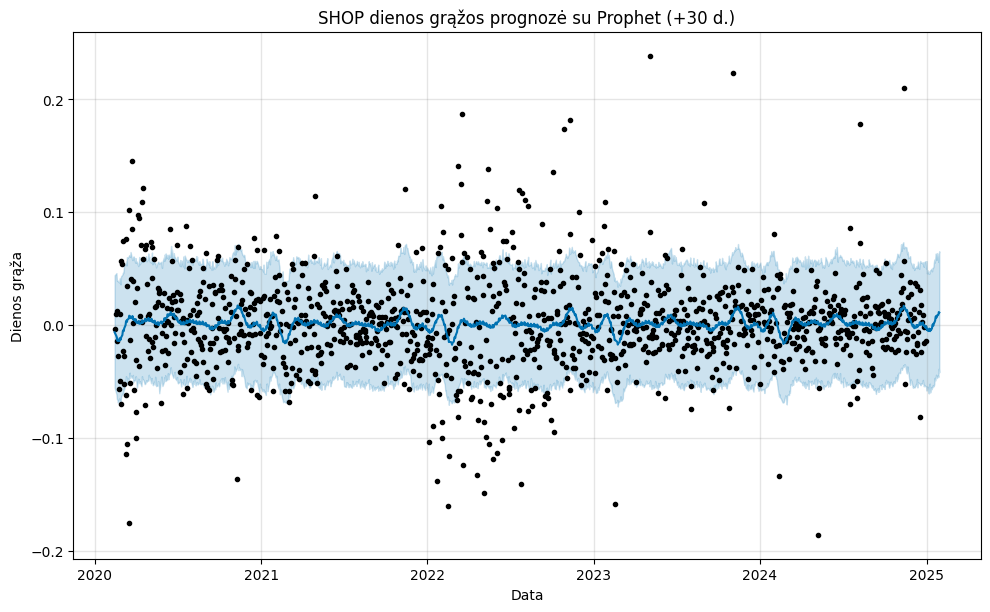

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/983ak3qh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/zvtutmrd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61056', 'data', 'file=/tmp/tmp_rsqlyd4/983ak3qh.json', 'init=/tmp/tmp_rsqlyd4/zvtutmrd.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_model1mta2g6z/prophet_model-20250614122357.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:23:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



🔮 Prognozuojama GRĄŽA: KO


12:23:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


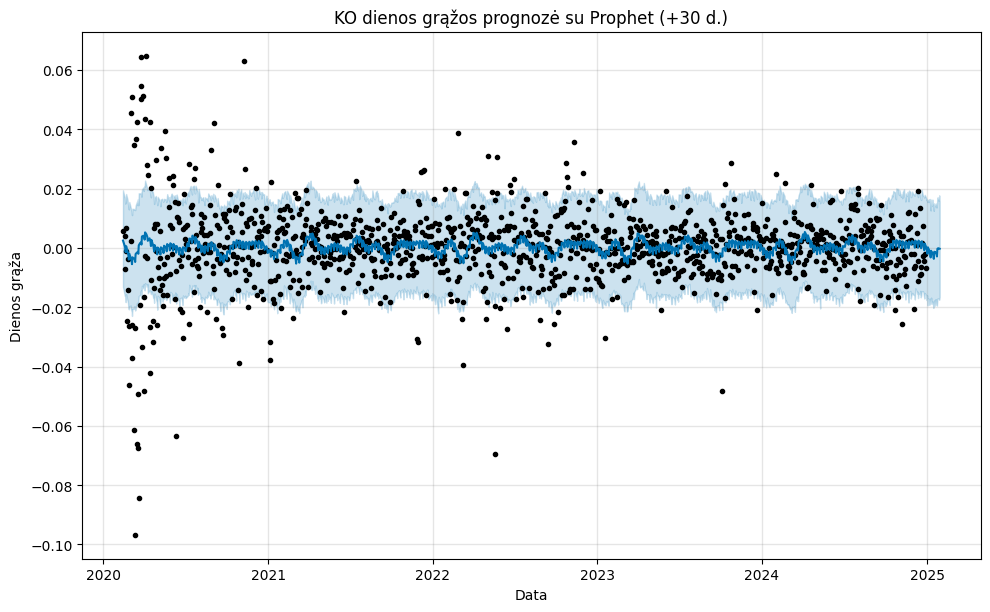

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/8wtzz6pg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/56gkqz2t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2090', 'data', 'file=/tmp/tmp_rsqlyd4/8wtzz6pg.json', 'init=/tmp/tmp_rsqlyd4/56gkqz2t.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_model9xtdwefh/prophet_model-20250614122359.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:23:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



🔮 Prognozuojama GRĄŽA: PEP


12:23:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


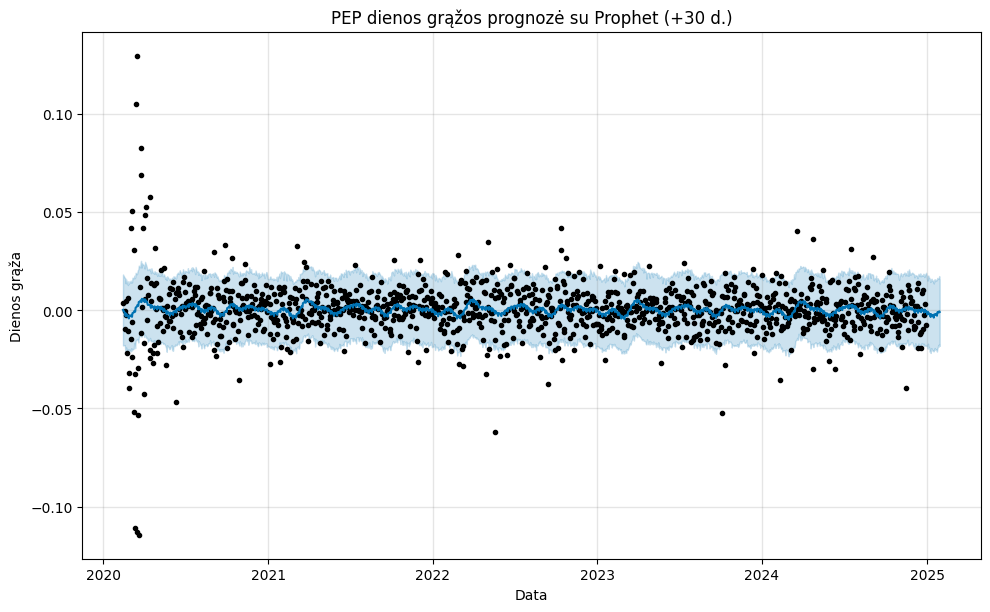

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/ibp6ndqx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/uull4le3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80840', 'data', 'file=/tmp/tmp_rsqlyd4/ibp6ndqx.json', 'init=/tmp/tmp_rsqlyd4/uull4le3.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_modelf5vugu5b/prophet_model-20250614122359.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:23:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



🔮 Prognozuojama GRĄŽA: NSRGY


12:23:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


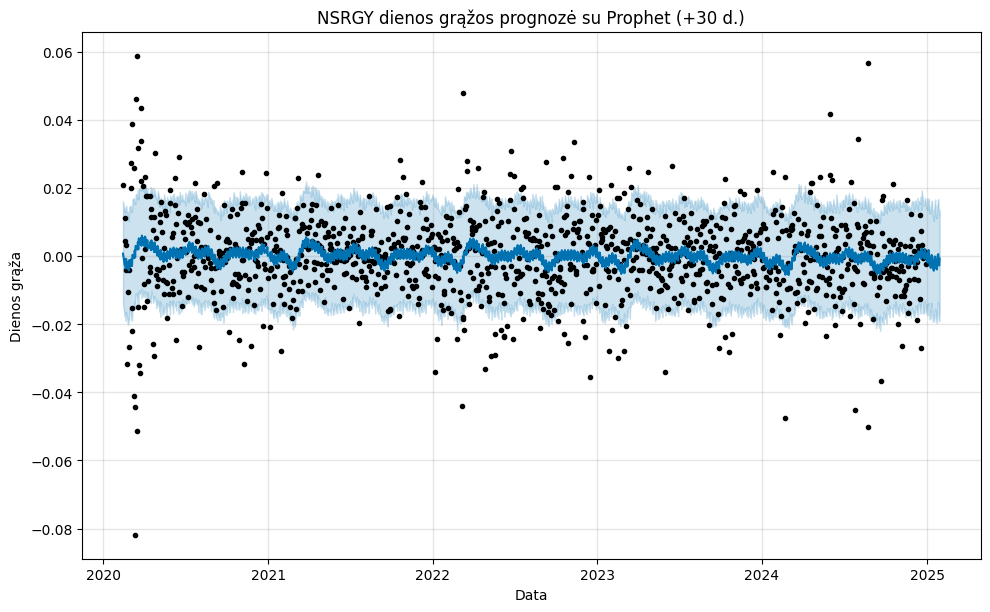

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/e5mvxvcq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/vzvfgi83.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60336', 'data', 'file=/tmp/tmp_rsqlyd4/e5mvxvcq.json', 'init=/tmp/tmp_rsqlyd4/vzvfgi83.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_modelucopanc9/prophet_model-20250614122400.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:24:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



🔮 Prognozuojama GRĄŽA: JNJ


12:24:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


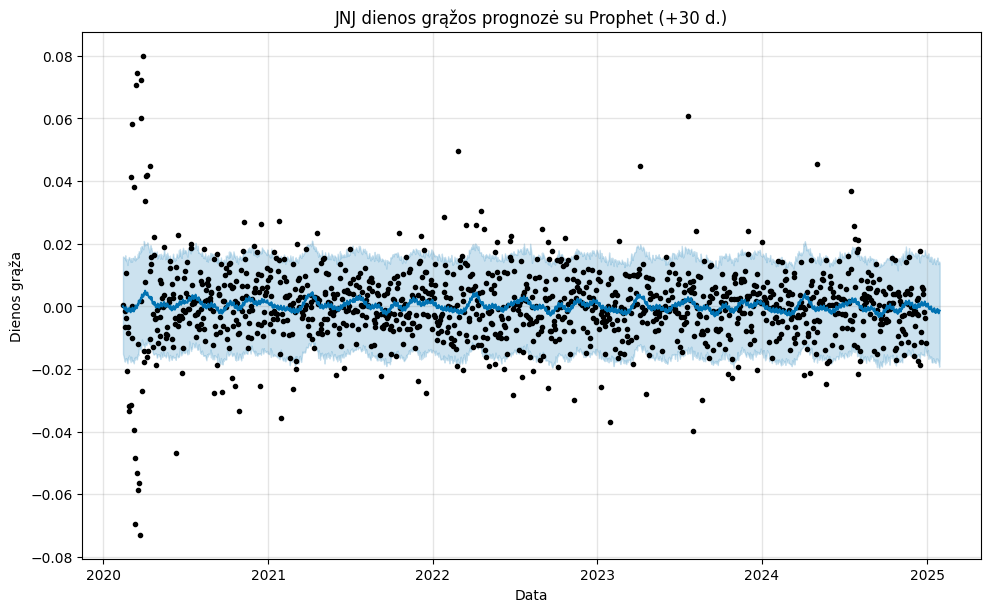

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/_qiluup7.json



🔮 Prognozuojama GRĄŽA: WMT


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/s9wwm54k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69746', 'data', 'file=/tmp/tmp_rsqlyd4/_qiluup7.json', 'init=/tmp/tmp_rsqlyd4/s9wwm54k.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_model0yd7femr/prophet_model-20250614122401.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:24:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:24:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


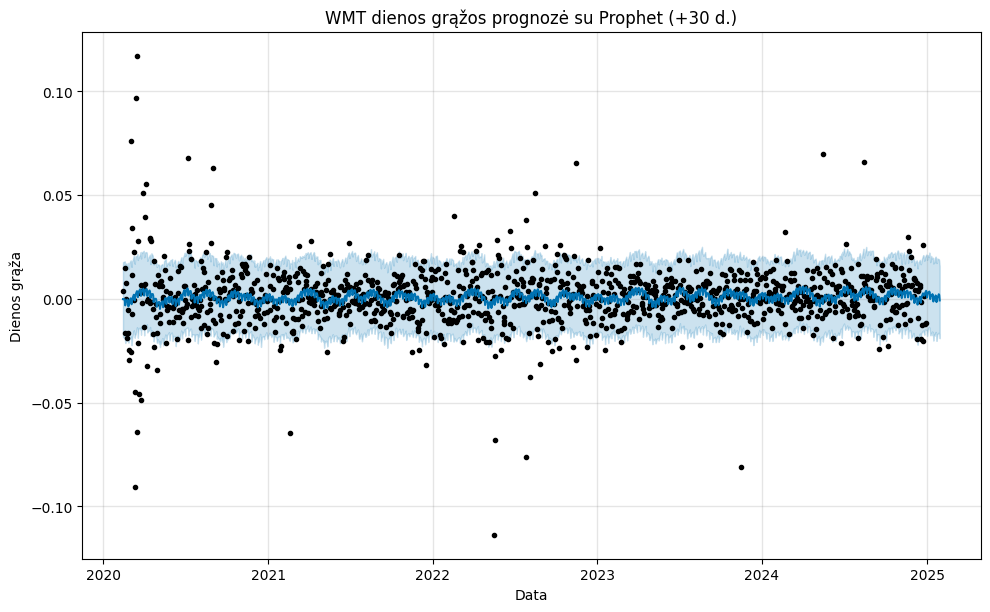

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/3bc3mydm.json



🔮 Prognozuojama GRĄŽA: PG


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/3fifyhwp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8198', 'data', 'file=/tmp/tmp_rsqlyd4/3bc3mydm.json', 'init=/tmp/tmp_rsqlyd4/3fifyhwp.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_modelvvorv6ee/prophet_model-20250614122402.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:24:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:24:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


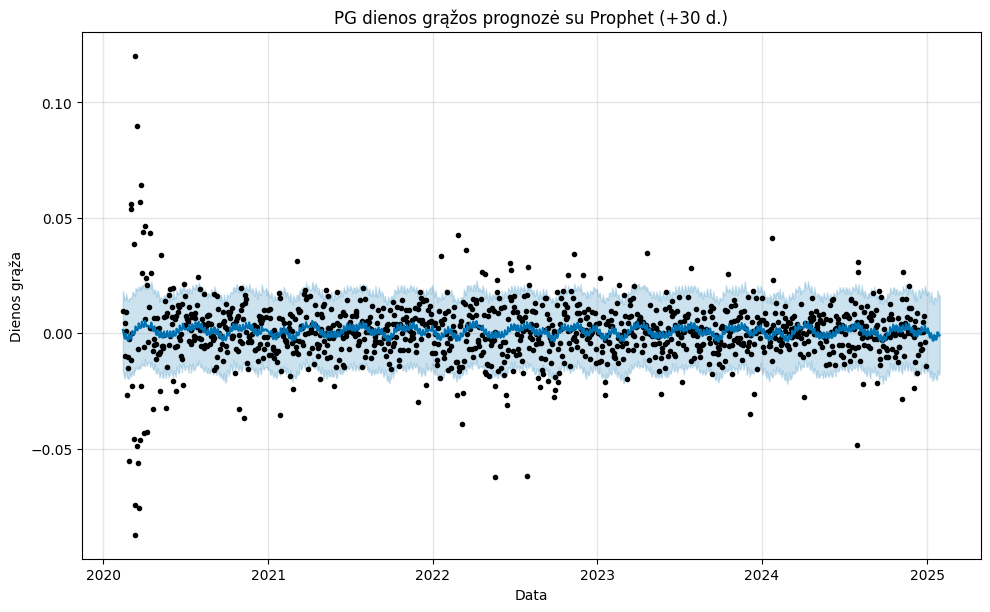

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/uj78anbf.json



🔮 Prognozuojama GRĄŽA: ^GSPC


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/6_3lih3p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43393', 'data', 'file=/tmp/tmp_rsqlyd4/uj78anbf.json', 'init=/tmp/tmp_rsqlyd4/6_3lih3p.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_modeltycwnix2/prophet_model-20250614122403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:24:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:24:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


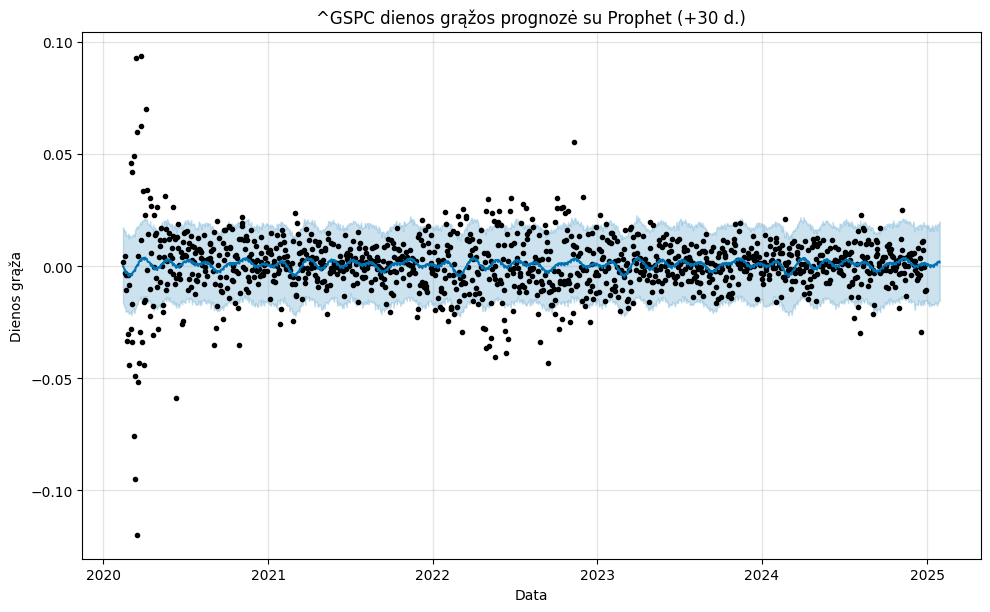

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/g5e6cud5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/6hgsbp9h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22709', 'data', 'file=/tmp/tmp_rsqlyd4/g5e6cud5.json', 'init=/tmp/tmp_rsqlyd4/6hgsbp9h.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_model9tinqcg9/prophet_model-20250614122404.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:24:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



🔮 Prognozuojama GRĄŽA: ^IXIC


12:24:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


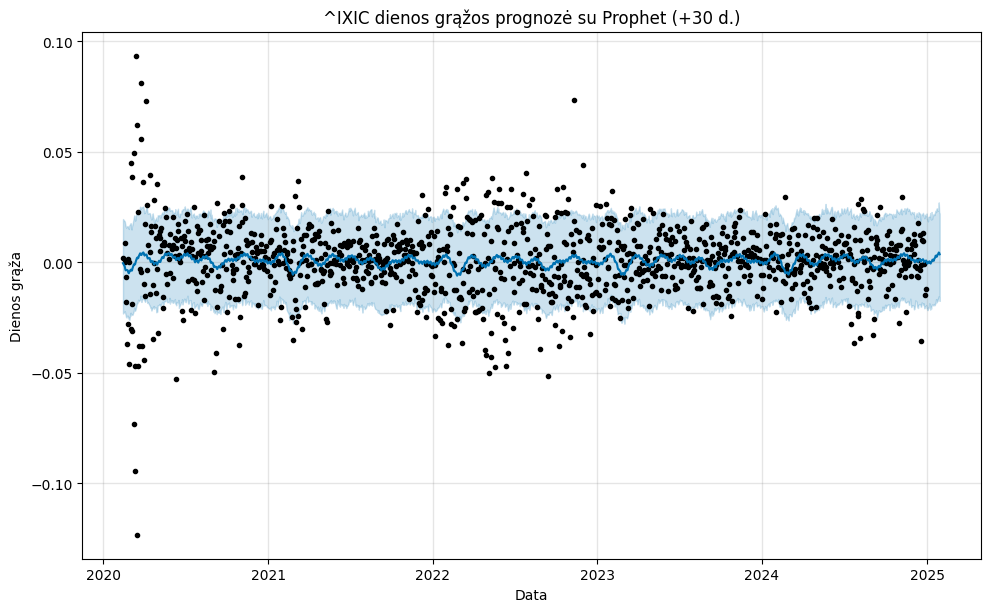

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/dnh9119t.json



🔮 Prognozuojama GRĄŽA: ^DJI


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/9e7illoy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84053', 'data', 'file=/tmp/tmp_rsqlyd4/dnh9119t.json', 'init=/tmp/tmp_rsqlyd4/9e7illoy.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_modelgjyz985m/prophet_model-20250614122405.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:24:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:24:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


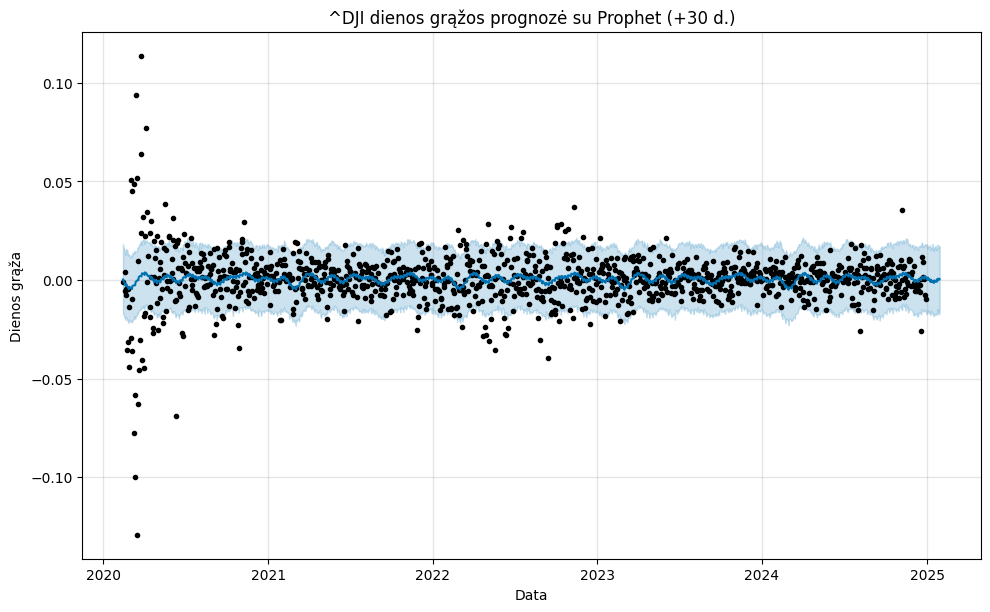

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/h14gccb7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/q4pe7xmp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27672', 'data', 'file=/tmp/tmp_rsqlyd4/h14gccb7.json', 'init=/tmp/tmp_rsqlyd4/q4pe7xmp.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_modell_jy_wkk/prophet_model-20250614122406.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:24:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



🔮 Prognozuojama GRĄŽA: ^RUT


12:24:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


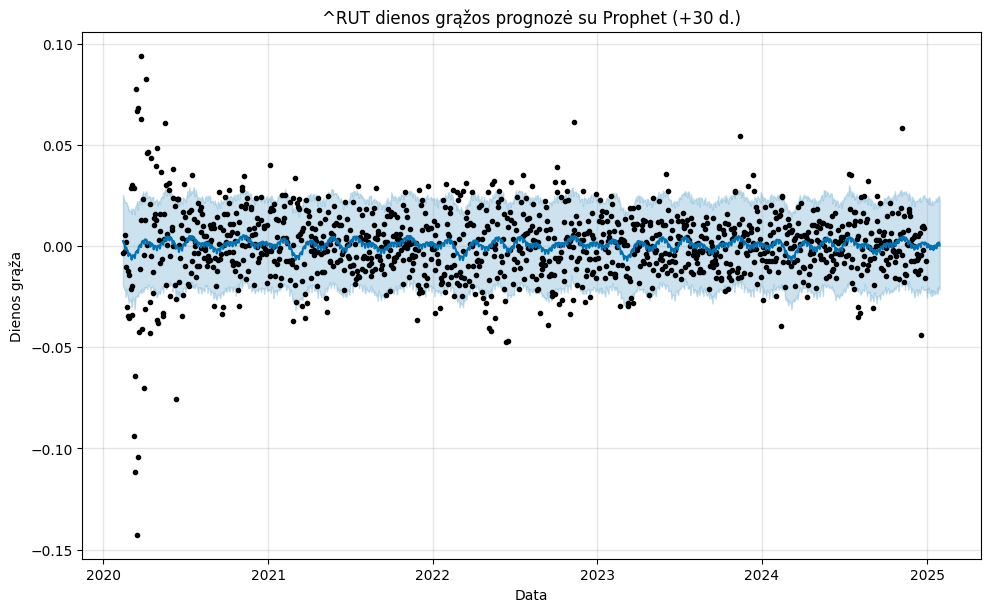

In [56]:
from prophet import Prophet
import matplotlib.pyplot as plt

forecast_days = 30

# Skaičiuojame dienos grąžą (pct_change)
returns_data = data.pct_change().dropna()

for symbol in symbols:
    try:
        print(f"\n🔮 Prognozuojama GRĄŽA: {symbol}")

        df_return = returns_data[[symbol]].reset_index()
        df_return.columns = ['ds', 'y']
        df_return = df_return.dropna()

        # Prophet modelis grąžai
        model = Prophet(daily_seasonality=True)
        model.fit(df_return)

        # Sukuriam datas prognozei
        future = model.make_future_dataframe(periods=forecast_days)
        forecast = model.predict(future)

        # Braižom
        fig = model.plot(forecast)
        plt.title(f"{symbol} dienos grąžos prognozė su Prophet (+{forecast_days} d.)")
        plt.xlabel('Data')
        plt.ylabel('Dienos grąža')
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"⚠️ Nepavyko prognozuoti grąžos {symbol}: {e}")


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/k7rw5f9b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/0lmqdyf5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79246', 'data', 'file=/tmp/tmp_rsqlyd4/k7rw5f9b.json', 'init=/tmp/tmp_rsqlyd4/0lmqdyf5.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_modeluuxcotdg/prophet_model-20250614122444.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:24:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:24:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/30ra_u15.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/b9gdrokq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

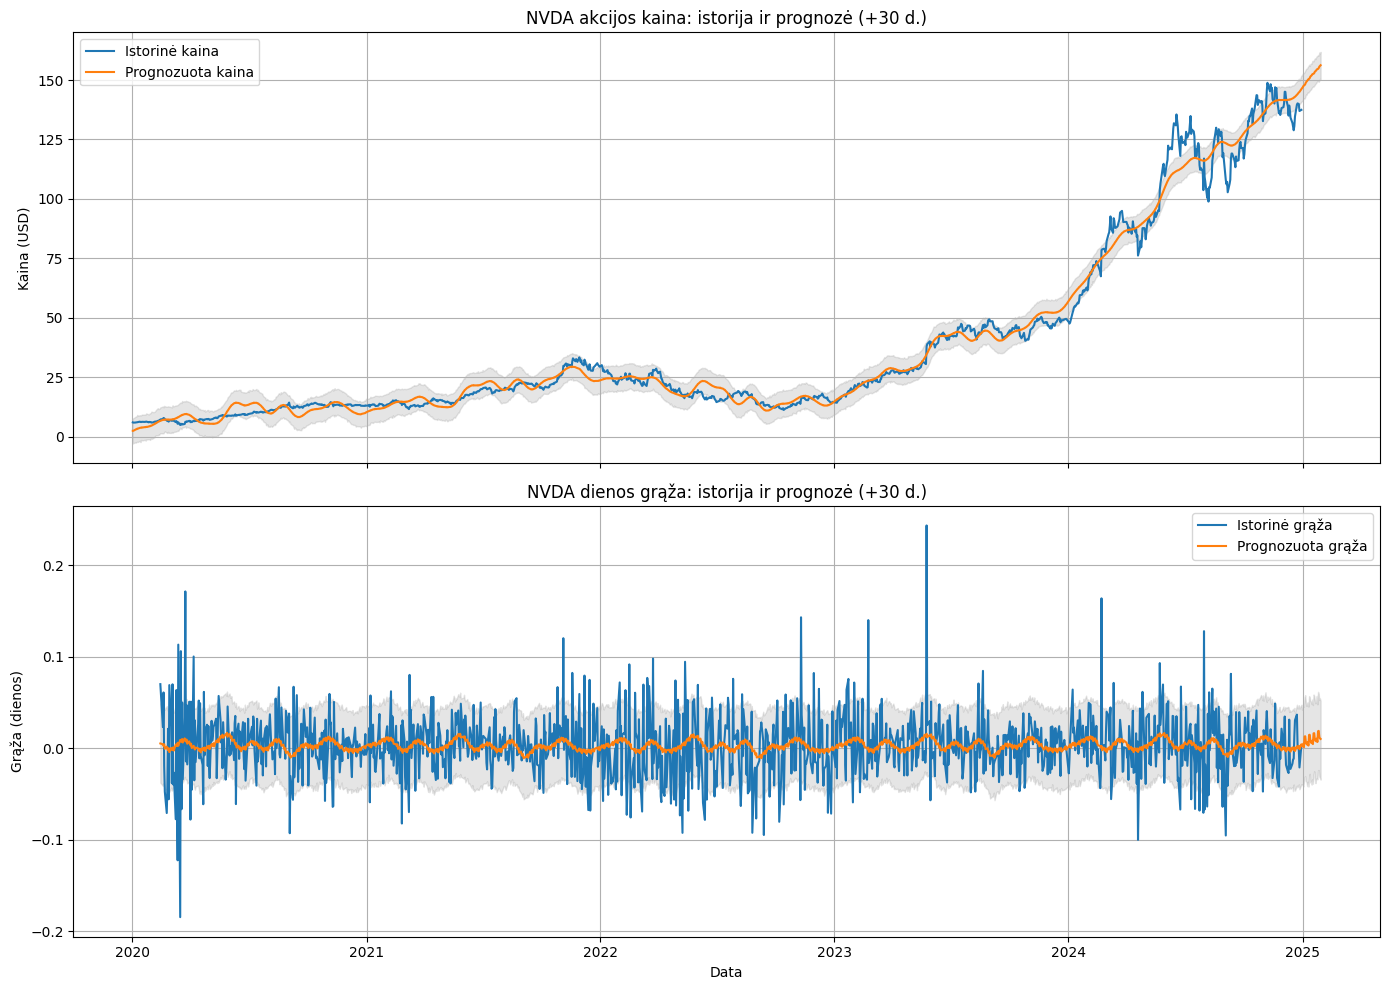


📈 Tikėtina metinė grąža (pagal prognozę): 890.32%
📊 Vidutinė prognozuota dienos grąža: 0.0091


In [57]:
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np

forecast_days = 30
symbol = 'NVDA'  # Pavyzdžiui, vienai akcijai – gali iteruoti per `symbols`

# --- 1. KAINOS PROGNOZĖ ---

df_price = data[[symbol]].reset_index()
df_price.columns = ['ds', 'y']
df_price = df_price.dropna()

model_price = Prophet(daily_seasonality=True)
model_price.fit(df_price)

future_price = model_price.make_future_dataframe(periods=forecast_days)
forecast_price = model_price.predict(future_price)

# --- 2. DIENOS GRĄŽOS PROGNOZĖ ---

returns = data.pct_change().dropna()
df_return = returns[[symbol]].reset_index()
df_return.columns = ['ds', 'y']
df_return = df_return.dropna()

model_return = Prophet(daily_seasonality=True)
model_return.fit(df_return)

future_return = model_return.make_future_dataframe(periods=forecast_days)
forecast_return = model_return.predict(future_return)

# --- 3. VIZUALIZUOJAME KARTU ---

fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Kaina
axs[0].plot(df_price['ds'], df_price['y'], label='Istorinė kaina')
axs[0].plot(forecast_price['ds'], forecast_price['yhat'], label='Prognozuota kaina')
axs[0].fill_between(forecast_price['ds'], forecast_price['yhat_lower'], forecast_price['yhat_upper'], color='gray', alpha=0.2)
axs[0].set_title(f'{symbol} akcijos kaina: istorija ir prognozė (+{forecast_days} d.)')
axs[0].set_ylabel('Kaina (USD)')
axs[0].legend()
axs[0].grid(True)

# Grąža
axs[1].plot(df_return['ds'], df_return['y'], label='Istorinė grąža')
axs[1].plot(forecast_return['ds'], forecast_return['yhat'], label='Prognozuota grąža')
axs[1].fill_between(forecast_return['ds'], forecast_return['yhat_lower'], forecast_return['yhat_upper'], color='gray', alpha=0.2)
axs[1].set_title(f'{symbol} dienos grąža: istorija ir prognozė (+{forecast_days} d.)')
axs[1].set_ylabel('Grąža (dienos)')
axs[1].legend()
axs[1].grid(True)

plt.xlabel('Data')
plt.tight_layout()
plt.show()

# --- 4. METINĖ GRĄŽA IŠ PROGNOZĖS ---

# Paimam prognozuojamos grąžos vidurkį (per prognozuotas dienas)
mean_predicted_return = forecast_return.tail(forecast_days)['yhat'].mean()

# Apskaičiuojam metinę grąžą (252 prekybos dienos per metus)
expected_annual_return = (1 + mean_predicted_return)**252 - 1

print(f"\n📈 Tikėtina metinė grąža (pagal prognozę): {expected_annual_return:.2%}")
print(f"📊 Vidutinė prognozuota dienos grąža: {mean_predicted_return:.4f}")

🔮 Apdorojama: INTC


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/c25d8e5y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/72n45beh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94509', 'data', 'file=/tmp/tmp_rsqlyd4/c25d8e5y.json', 'init=/tmp/tmp_rsqlyd4/72n45beh.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_modeldwvxg1rv/prophet_model-20250614122636.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:26:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:26:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/yto6qwmp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/rx8mpwm_.json
DEBUG:cmdstanpy:idx 0


🔮 Apdorojama: NVDA


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18005', 'data', 'file=/tmp/tmp_rsqlyd4/yto6qwmp.json', 'init=/tmp/tmp_rsqlyd4/rx8mpwm_.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_modelwjoyuj0a/prophet_model-20250614122637.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:26:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:26:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/o2wvyr4u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/b1_kdhmk.json
DEBUG:cmdstanpy:idx 0


🔮 Apdorojama: MSFT


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64083', 'data', 'file=/tmp/tmp_rsqlyd4/o2wvyr4u.json', 'init=/tmp/tmp_rsqlyd4/b1_kdhmk.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_model83zfsod2/prophet_model-20250614122637.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:26:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:26:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/zt_pt45_.json


🔮 Apdorojama: AMD


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/08rajdbv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75201', 'data', 'file=/tmp/tmp_rsqlyd4/zt_pt45_.json', 'init=/tmp/tmp_rsqlyd4/08rajdbv.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_modelx26hmtc6/prophet_model-20250614122638.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:26:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:26:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/cqyqckga.json


🔮 Apdorojama: NFLX


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/vaa9ehi6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49616', 'data', 'file=/tmp/tmp_rsqlyd4/cqyqckga.json', 'init=/tmp/tmp_rsqlyd4/vaa9ehi6.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_modelfd0sc5jy/prophet_model-20250614122639.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:26:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:26:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/g20_5ck6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/vm27j6sj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

🔮 Apdorojama: SNAP


12:26:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/gzfq9mu7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/5n08by6s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38822', 'data', 'file=/tmp/tmp_rsqlyd4/gzfq9mu7.json', 'init=/tmp/tmp_rsqlyd4/5n08by6s.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_model7hkbsi4p/prophet_model-20250614122640.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:26:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:26:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


🔮 Apdorojama: AMZN


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/fg5kdidz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/_u158thl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27448', 'data', 'file=/tmp/tmp_rsqlyd4/fg5kdidz.json', 'init=/tmp/tmp_rsqlyd4/_u158thl.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_model2tjbiwgk/prophet_model-20250614122640.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:26:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:26:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


🔮 Apdorojama: SHOP


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/u5xltn1d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/um8vyyvf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73742', 'data', 'file=/tmp/tmp_rsqlyd4/u5xltn1d.json', 'init=/tmp/tmp_rsqlyd4/um8vyyvf.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_modelettlholo/prophet_model-20250614122641.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:26:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


🔮 Apdorojama: KO


12:26:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/nrai56fh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/j_1zxsht.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93263', 'data', 'file=/tmp/tmp_rsqlyd4/nrai56fh.json', 'init=/tmp/tmp_rsqlyd4/j_1zxsht.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_model37s3ib_v/prophet_model-20250614122641.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:26:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:26:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


🔮 Apdorojama: PEP


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/kk9wxbby.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/kbwal8g1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21189', 'data', 'file=/tmp/tmp_rsqlyd4/kk9wxbby.json', 'init=/tmp/tmp_rsqlyd4/kbwal8g1.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_model2s3gdn3j/prophet_model-20250614122642.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:26:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:26:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


🔮 Apdorojama: NSRGY


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/afq8sdq8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/tlk8dgar.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37493', 'data', 'file=/tmp/tmp_rsqlyd4/afq8sdq8.json', 'init=/tmp/tmp_rsqlyd4/tlk8dgar.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_modelebo8joez/prophet_model-20250614122642.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:26:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:26:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


🔮 Apdorojama: JNJ


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/e7_yjb4g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/5q26m5p1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37480', 'data', 'file=/tmp/tmp_rsqlyd4/e7_yjb4g.json', 'init=/tmp/tmp_rsqlyd4/5q26m5p1.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_modelctd6cdut/prophet_model-20250614122642.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:26:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


🔮 Apdorojama: WMT


12:26:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/ve5dp6bg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/hf267bnh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9280', 'data', 'file=/tmp/tmp_rsqlyd4/ve5dp6bg.json', 'init=/tmp/tmp_rsqlyd4/hf267bnh.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_modelgi0uw0y0/prophet_model-20250614122643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:26:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:26:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


🔮 Apdorojama: PG


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/id201w25.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/m1ahskzs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40401', 'data', 'file=/tmp/tmp_rsqlyd4/id201w25.json', 'init=/tmp/tmp_rsqlyd4/m1ahskzs.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_modelamky3z10/prophet_model-20250614122643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:26:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


🔮 Apdorojama: ^GSPC


12:26:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/ccsm1lmu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/brrobjxw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28546', 'data', 'file=/tmp/tmp_rsqlyd4/ccsm1lmu.json', 'init=/tmp/tmp_rsqlyd4/brrobjxw.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_modelupq1wzoi/prophet_model-20250614122644.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:26:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:26:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


🔮 Apdorojama: ^IXIC


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/15em55md.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/22za5968.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4353', 'data', 'file=/tmp/tmp_rsqlyd4/15em55md.json', 'init=/tmp/tmp_rsqlyd4/22za5968.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_modelflmhjct0/prophet_model-20250614122644.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:26:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


🔮 Apdorojama: ^DJI


12:26:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/aiwxdsde.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_rsqlyd4/xf38riwr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68266', 'data', 'file=/tmp/tmp_rsqlyd4/aiwxdsde.json', 'init=/tmp/tmp_rsqlyd4/xf38riwr.json', 'output', 'file=/tmp/tmp_rsqlyd4/prophet_modelwprbyujw/prophet_model-20250614122644.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:26:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:26:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


🔮 Apdorojama: ^RUT

📋 Prognozuotos metinės grąžos:
NVDA     890.32%
NFLX      92.87%
AMZN      80.73%
^IXIC     46.62%
WMT       39.28%
MSFT      37.46%
SHOP      34.69%
AMD       33.20%
INTC      23.00%
^GSPC     19.16%
^DJI      -4.98%
^RUT      -5.05%
JNJ      -21.18%
PG       -24.38%
SNAP     -25.51%
KO       -27.30%
NSRGY    -27.52%
PEP      -39.32%
dtype: object


<ipython-input-58-1542312597>:44: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


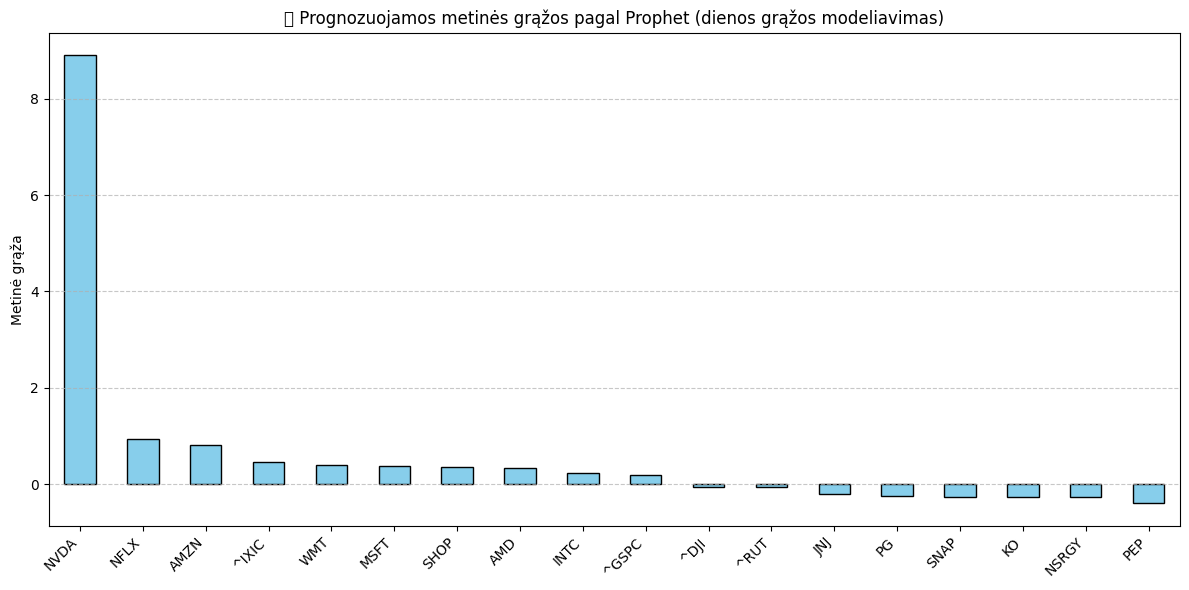

In [58]:
from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd

forecast_days = 30
expected_returns = {}

returns_data = data.pct_change().dropna()

for symbol in symbols:
    try:
        print(f"🔮 Apdorojama: {symbol}")

        df_return = returns_data[[symbol]].reset_index()
        df_return.columns = ['ds', 'y']
        df_return = df_return.dropna()

        model = Prophet(daily_seasonality=True)
        model.fit(df_return)

        future = model.make_future_dataframe(periods=forecast_days)
        forecast = model.predict(future)

        mean_pred_return = forecast.tail(forecast_days)['yhat'].mean()
        annual_return = (1 + mean_pred_return)**252 - 1

        expected_returns[symbol] = annual_return

    except Exception as e:
        print(f"⚠️ Nepavyko {symbol}: {e}")

# --- Lentelė ---
returns_df = pd.Series(expected_returns).sort_values(ascending=False)
print("\n📋 Prognozuotos metinės grąžos:")
print(returns_df.apply(lambda x: f"{x:.2%}"))

# --- Vizualizacija ---
plt.figure(figsize=(12, 6))
returns_df.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('📈 Prognozuojamos metinės grąžos pagal Prophet (dienos grąžos modeliavimas)')
plt.ylabel('Metinė grąža')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-60-1063221077>:29: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


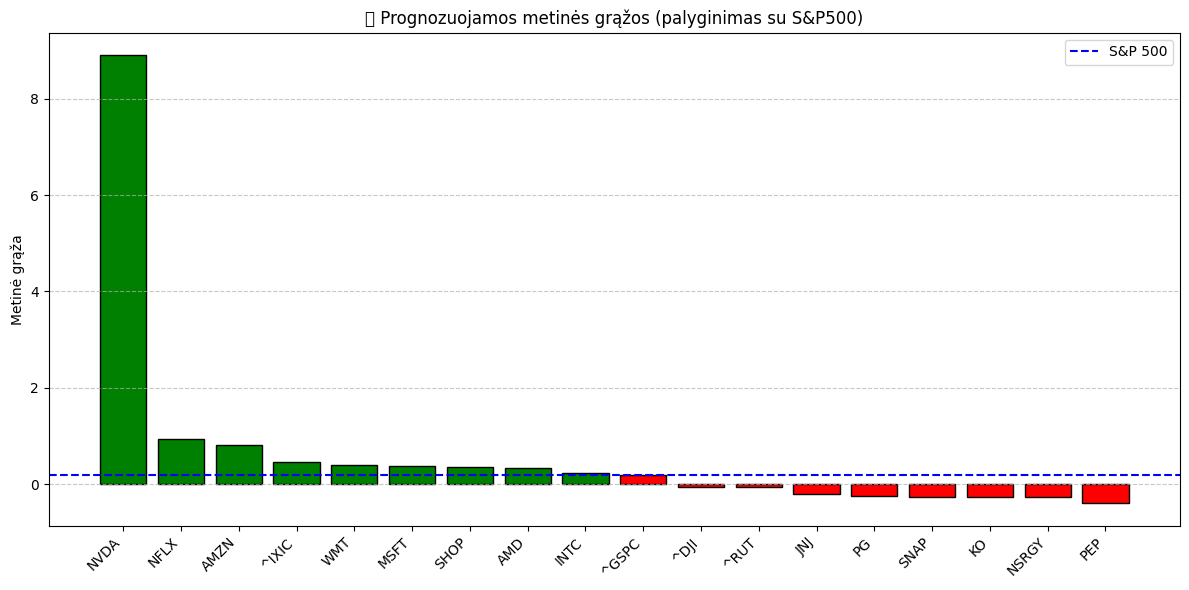


📋 Palyginimas su S&P500:



In [60]:
# --- 1. GSPC grąža ---
gspc_return = expected_returns.get('^GSPC')

# Patikrinimas
if gspc_return is None:
    raise ValueError("❌ Trūksta ^GSPC duomenų – įsitikink, kad jis įtrauktas į 'symbols' sąrašą.")

# --- 2. Pažymime, kurios akcijos lenkia S&P500 ---
comparison_df = pd.DataFrame.from_dict(expected_returns, orient='index', columns=['ExpectedAnnualReturn'])
comparison_df['vs_S&P500'] = comparison_df['ExpectedAnnualReturn'].apply(
    lambda x: 'Lenkia' if x > gspc_return else 'Atsilieka'
)

# Rikiuojame
comparison_df = comparison_df.sort_values(by='ExpectedAnnualReturn', ascending=False)

# --- 3. Atvaizduojame ---
plt.figure(figsize=(12, 6))
colors = comparison_df['vs_S&P500'].map({'Lenkia': 'green', 'Atsilieka': 'red'})

bars = plt.bar(comparison_df.index, comparison_df['ExpectedAnnualReturn'], color=colors, edgecolor='black')
plt.axhline(y=gspc_return, color='blue', linestyle='--', label='S&P 500')

plt.title('📈 Prognozuojamos metinės grąžos (palyginimas su S&P500)')
plt.ylabel('Metinė grąža')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- 4. Lentelė konspektui ---
print("\n📋 Palyginimas su S&P500:\n")
display(comparison_df.style.format({"ExpectedAnnualReturn": "{:.2%}"}))

<ipython-input-61-1102498740>:40: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-61-1102498740>:40: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-61-1102498740>:40: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.

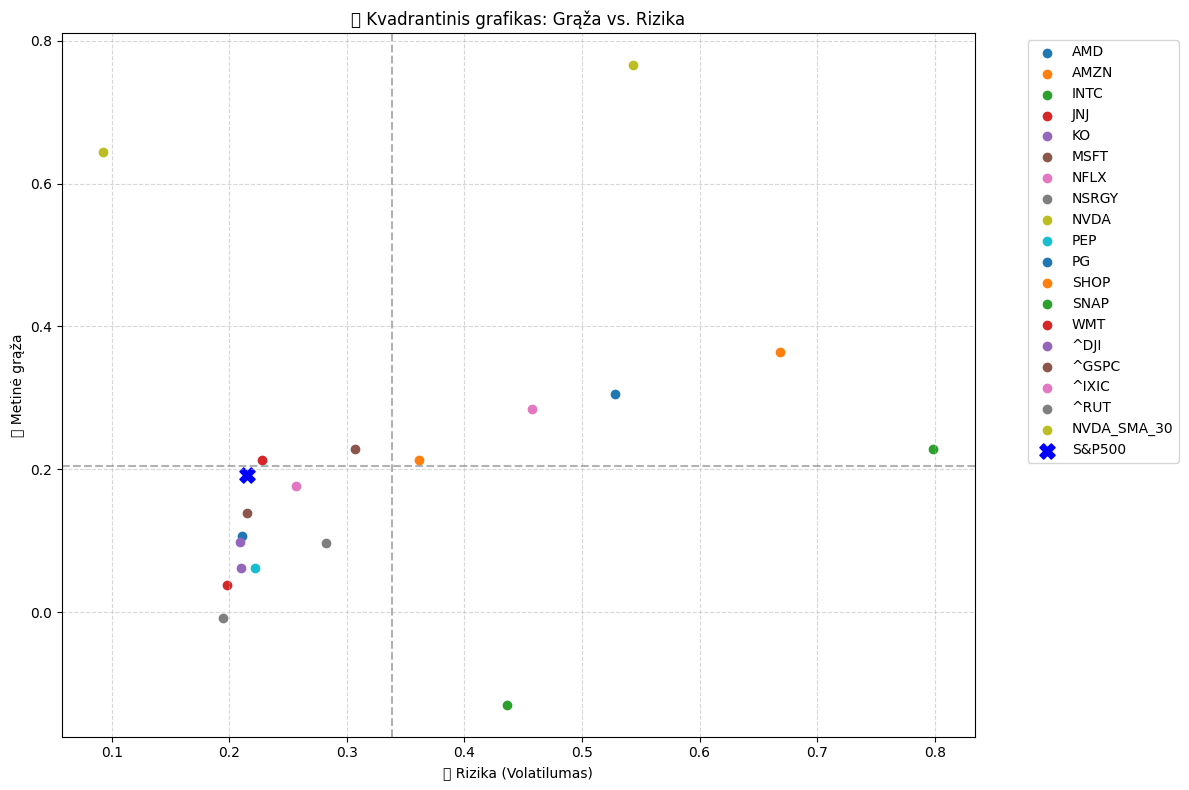

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- Apskaičiuojame metinę grąžą ir volatilumą ---
returns = data.pct_change().dropna()
annual_returns = returns.mean() * 252
annual_volatility = returns.std() * np.sqrt(252)

# --- Sudarome DataFrame ---
risk_return_df = pd.DataFrame({
    'AnnualReturn': annual_returns,
    'AnnualVolatility': annual_volatility
})

# Pridedame S&P500
gspc_return = expected_returns.get('^GSPC', annual_returns.get('^GSPC', None))
gspc_vol = annual_volatility.get('^GSPC', None)

# --- Braižome ---
plt.figure(figsize=(12, 8))
for symbol in risk_return_df.index:
    r = risk_return_df.loc[symbol, 'AnnualReturn']
    v = risk_return_df.loc[symbol, 'AnnualVolatility']
    plt.scatter(v, r, label=symbol)

# Pažymime S&P500
if gspc_return and gspc_vol:
    plt.scatter(gspc_vol, gspc_return, color='blue', marker='X', s=120, label='S&P500')

# Ašys ir kvadrantai
plt.axhline(y=annual_returns.mean(), color='gray', linestyle='--', alpha=0.6)
plt.axvline(x=annual_volatility.mean(), color='gray', linestyle='--', alpha=0.6)

plt.xlabel('📉 Rizika (Volatilumas)')
plt.ylabel('📈 Metinė grąža')
plt.title('🎯 Kvadrantinis grafikas: Grąža vs. Rizika')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [62]:
# Sektorių klasifikacija
sector_map = {
    # Technologijos (augimo)
    'NVDA': 'Tech', 'AMD': 'Tech', 'MSFT': 'Tech', 'INTC': 'Tech', 'NFLX': 'Tech',
    'AMZN': 'Tech', 'SNAP': 'Tech', 'SHOP': 'Tech',

    # Defensyvūs / stabilumo
    'KO': 'Defensive', 'PEP': 'Defensive', 'JNJ': 'Defensive',
    'PG': 'Defensive', 'WMT': 'Defensive', 'NSRGY': 'Defensive',

    # Indeksai
    '^GSPC': 'Index', '^IXIC': 'Index', '^DJI': 'Index', '^RUT': 'Index'
}

<ipython-input-70-1248436037>:46: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-70-1248436037>:46: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-70-1248436037>:46: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


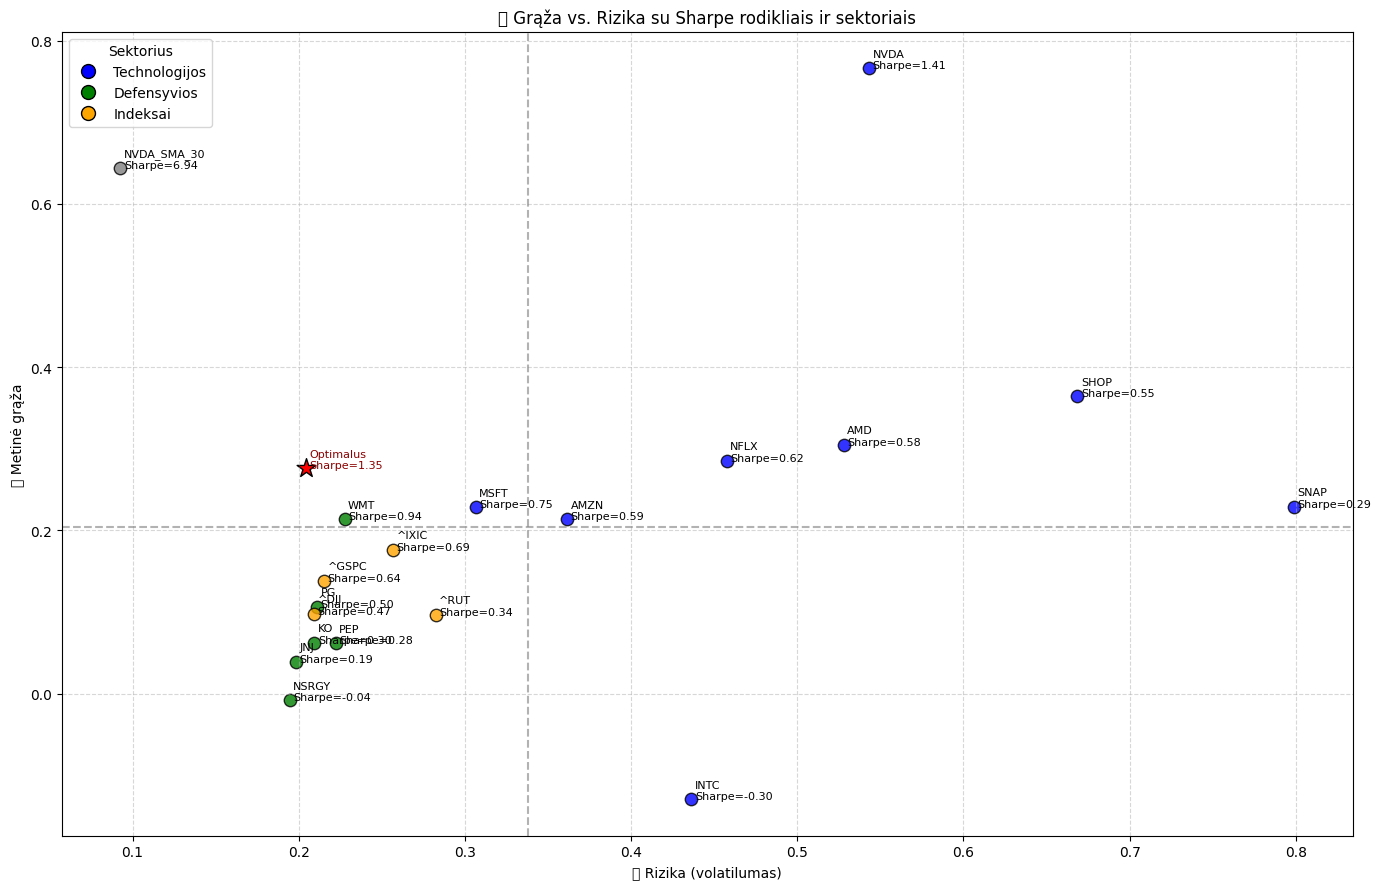

In [70]:
# Priklauso nuo sector_map
colors_map = {'Tech': 'blue', 'Defensive': 'green', 'Index': 'orange'}
labels_map = {'Tech': 'Technologijos', 'Defensive': 'Defensyvios', 'Index': 'Indeksai'}

# Portfelio optimizacijos rezultatai (iš anksčiau)
optimal_return = results[0, max_sharpe_idx]
optimal_volatility = results[1, max_sharpe_idx]
optimal_sharpe = results[2, max_sharpe_idx]

plt.figure(figsize=(14, 9))

for symbol in risk_return_df.index:
    if symbol not in annual_returns or symbol not in annual_volatility:
        continue

    r = annual_returns[symbol]
    v = annual_volatility[symbol]
    sharpe = r / v if v != 0 else 0
    sector = sector_map.get(symbol, 'Other')
    color = colors_map.get(sector, 'gray')

    # Piešiame tašką
    plt.scatter(v, r, color=color, s=80, edgecolor='black', alpha=0.8)

    # Pridedame Sharpe rodiklį kaip tekstą
    plt.text(v + 0.002, r, f"{symbol}\nSharpe={sharpe:.2f}", fontsize=8)

plt.scatter(optimal_volatility, optimal_return, color='red', marker='*', s=200, label='Optimalus portfelis', edgecolor='black')
plt.text(optimal_volatility + 0.002, optimal_return, f"Optimalus\nSharpe={optimal_sharpe:.2f}", fontsize=8, color='darkred')
# Vidutinės linijos
plt.axhline(y=annual_returns.mean(), color='gray', linestyle='--', alpha=0.6)
plt.axvline(x=annual_volatility.mean(), color='gray', linestyle='--', alpha=0.6)

# Legenda
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=labels_map[s], markerfacecolor=c, markersize=10, markeredgecolor='black')
    for s, c in colors_map.items()
]
plt.legend(handles=legend_elements, title='Sektorius', loc='upper left')

plt.title('🎯 Grąža vs. Rizika su Sharpe rodikliais ir sektoriais')
plt.xlabel('📉 Rizika (volatilumas)')
plt.ylabel('📈 Metinė grąža')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [6]:
!pip install streamlit

2025-06-14 22:18:19.350 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 22:18:19.363 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 22:18:19.366 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 22:18:19.369 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 22:18:19.380 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 22:18:19.384 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 22:18:19.388 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 22:18:19.391 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  9 of 9 completed
2025-06-14 22:18:23.817 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 22:18:23.831 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 22:18:26.748 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 22:18:26.764 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 22:18:26.767 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 22:18:26.771 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 22:18:26.774 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 22:18:26.780 Thread 'MainThread': miss

DeltaGenerator()

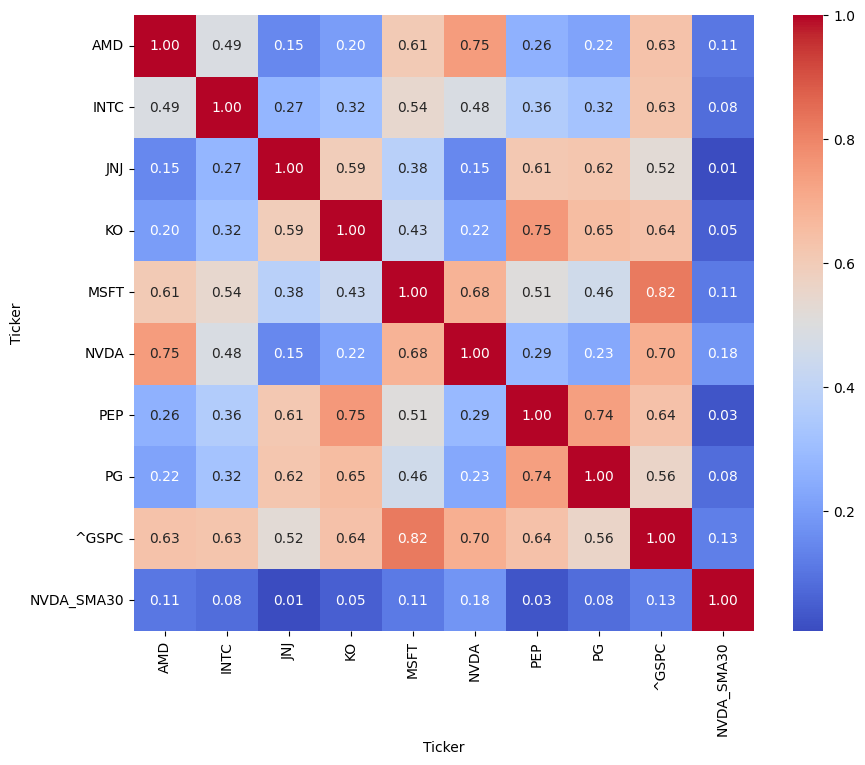

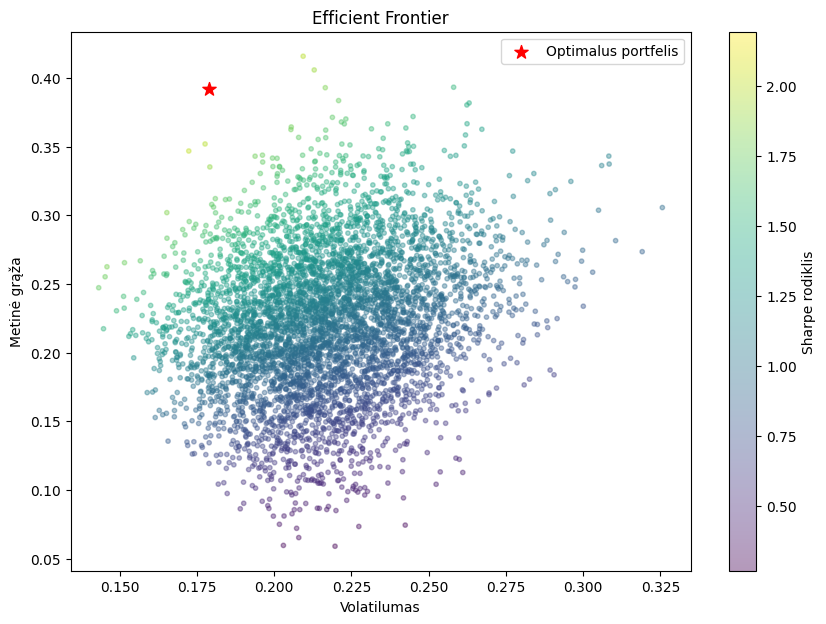

In [7]:
import streamlit as st
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# --- Puslapio konfigūracija ---
st.set_page_config(page_title="Akcijų analizė", layout="wide")
st.title("📊 Akcijų duomenų analizė")

# --- Vartotojo įvestis ---
def_user_symbols = ['NVDA', 'MSFT', 'AMD', 'INTC', 'KO', 'PEP', 'JNJ', 'PG', '^GSPC']
symbols = st.multiselect("Pasirinkite akcijas analizavimui:", options=def_user_symbols, default=def_user_symbols)

start_date = st.date_input("Pradžios data:", datetime(2020, 1, 1))
end_date = st.date_input("Pabaigos data:", datetime(2024, 12, 31))

if len(symbols) < 2:
    st.warning("Pasirinkite bent 2 akcijas analizei.")
    st.stop()

# --- Duomenų atsisiuntimas ---
data = yf.download(symbols, start=start_date, end=end_date)['Close']
data = data.dropna()
st.subheader("🔍 Istorinės kainos")
st.line_chart(data)

# --- Slankusis vidurkis ---
st.subheader("📉 Slankusis vidurkis (30 d.)")
selected_stock = st.selectbox("Pasirinkite akciją slankiajam vidurkiui:", symbols)
data[f'{selected_stock}_SMA30'] = data[selected_stock].rolling(window=30).mean()
st.line_chart(data[[selected_stock, f'{selected_stock}_SMA30']])

# --- Dienos grąžos ---
returns = data.pct_change().dropna()
daily_mean_return = returns.mean()
st.subheader("📈 Vidutinė dienos grąža")
st.write(daily_mean_return.sort_values(ascending=False))

# --- Koreliacijų matrica ---
st.subheader("🔗 Koreliacijų matrica")
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
st.pyplot(fig)

# --- Portfelio optimizavimas ---
st.subheader("💼 Portfelio optimizacija (Efficient Frontier)")
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()
annual_returns = mean_daily_returns * 252
annual_cov_matrix = cov_matrix * 252
num_portfolios = 5000
results = np.zeros((3, num_portfolios))
weights_record = []
tickers = returns.columns

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    weights_record.append(weights)
    port_return = np.dot(weights, annual_returns)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(annual_cov_matrix, weights)))
    sharpe_ratio = port_return / port_volatility
    results[0,i] = port_return
    results[1,i] = port_volatility
    results[2,i] = sharpe_ratio

max_sharpe_idx = np.argmax(results[2])
optimal_weights = weights_record[max_sharpe_idx]
optimal_return = results[0, max_sharpe_idx]
optimal_vol = results[1, max_sharpe_idx]
optimal_sharpe = results[2, max_sharpe_idx]

# Vizualizacija
fig2, ax2 = plt.subplots(figsize=(10, 7))
sc = ax2.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', alpha=0.4, s=10)
ax2.scatter(optimal_vol, optimal_return, c='red', s=100, marker='*', label='Optimalus portfelis')
ax2.set_xlabel('Volatilumas')
ax2.set_ylabel('Metinė grąža')
ax2.set_title('Efficient Frontier')
ax2.legend()
fig2.colorbar(sc, label='Sharpe rodiklis')
st.pyplot(fig2)

# Parodome optimalų portfelį
st.markdown("**Optimalus portfelis pagal Sharpe rodiklį:**")
opt_df = pd.DataFrame({
    'Akcija': tickers,
    'Svoris': [f"{w:.2%}" for w in optimal_weights]
})
st.dataframe(opt_df.set_index('Akcija'))
st.markdown(f"**Metinė grąža:** {optimal_return:.2%}<br>**Volatilumas:** {optimal_vol:.2%}<br>**Sharpe:** {optimal_sharpe:.2f}", unsafe_allow_html=True)